# Import the libraries

In [2]:
pip install psycopg2


Note: you may need to restart the kernel to use updated packages.


In [3]:
import json
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys

# Connection for Database

In [4]:
def connect_to_DB():
    connection = psycopg2.connect(user ='postgres',password='myroot',
                                 host='localhost',port =5432 , database='employees_db')
    return connection

In [5]:
conn = connect_to_DB()

# Q 1. Check for data inconsistency

# Department Dataframe

In [6]:
# Depatments Dataframe

department_df = pd.read_sql_query("""select * from employees.department""",conn)
department_df

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\2236459350.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  department_df = pd.read_sql_query("""select * from employees.department""",conn)


,id,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


In [7]:
print(department_df.info())
print(department_df.shape)
print(department_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         9 non-null      object
 1   dept_name  9 non-null      object
dtypes: object(2)
memory usage: 276.0+ bytes
None
(9, 2)
Index(['id', 'dept_name'], dtype='object')


In [8]:
print('size of department dataframe : ',sys.getsizeof(department_df))

size of department dataframe :  1325


In [9]:
# analytical summary
department_df.describe(include='all')

,id,dept_name
count,9,9
unique,9,9
top,d001,Marketing
freq,1,1


# Department_Employees Dataframe

In [10]:
dep_employee_df = pd.read_sql_query("""select * from employees.department_employee""",conn)
dep_employee_df

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\865061100.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dep_employee_df = pd.read_sql_query("""select * from employees.department_employee""",conn)


,employee_id,department_id,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01
...,...,...,...,...
331598,499995,d004,1997-06-02,9999-01-01
331599,499996,d004,1996-05-13,9999-01-01
331600,499997,d005,1987-08-30,9999-01-01
331601,499998,d002,1993-12-27,9999-01-01


In [11]:
print(dep_employee_df.info())
print(dep_employee_df.shape)
print(dep_employee_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331603 entries, 0 to 331602
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   employee_id    331603 non-null  int64 
 1   department_id  331603 non-null  object
 2   from_date      331603 non-null  object
 3   to_date        331603 non-null  object
dtypes: int64(1), object(3)
memory usage: 10.1+ MB
None
(331603, 4)
Index(['employee_id', 'department_id', 'from_date', 'to_date'], dtype='object')


In [12]:
print('size of department dataframe : ',sys.getsizeof(dep_employee_df))

size of department dataframe :  49409011


In [13]:
# analytical summary
dep_employee_df.describe(include='all')

,employee_id,department_id,from_date,to_date
count,331603.000000,331603,331603,331603
unique,NaN,9,6393,6085
top,NaN,d005,1990-12-28,9999-01-01
freq,NaN,85707,91,240124
mean,253332.605025,NaN,NaN,NaN
std,161831.919445,NaN,NaN,NaN
min,10001.000000,NaN,NaN,NaN
25%,85005.500000,NaN,NaN,NaN
50%,250001.000000,NaN,NaN,NaN
75%,424999.500000,NaN,NaN,NaN


# Department_manager Dataframe

In [14]:
dep_manager_df = pd.read_sql_query("""select * from employees.department_manager""",conn)
dep_manager_df

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\1192278846.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dep_manager_df = pd.read_sql_query("""select * from employees.department_manager""",conn)


,employee_id,department_id,from_date,to_date
0,110022,d001,1985-01-01,1991-10-01
1,110039,d001,1991-10-01,9999-01-01
2,110085,d002,1985-01-01,1989-12-17
3,110114,d002,1989-12-17,9999-01-01
4,110183,d003,1985-01-01,1992-03-21
5,110228,d003,1992-03-21,9999-01-01
6,110303,d004,1985-01-01,1988-09-09
7,110344,d004,1988-09-09,1992-08-02
8,110386,d004,1992-08-02,1996-08-30
9,110420,d004,1996-08-30,9999-01-01


In [15]:
print(dep_manager_df.info())
print(dep_manager_df.shape)
print(dep_manager_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   employee_id    24 non-null     int64 
 1   department_id  24 non-null     object
 2   from_date      24 non-null     object
 3   to_date        24 non-null     object
dtypes: int64(1), object(3)
memory usage: 900.0+ bytes
None
(24, 4)
Index(['employee_id', 'department_id', 'from_date', 'to_date'], dtype='object')


In [16]:
print('size of department dataframe : ',sys.getsizeof(dep_manager_df))

size of department dataframe :  3740


In [17]:
# analytical summary
dep_manager_df.describe(include='all')

,employee_id,department_id,from_date,to_date
count,24.000000,24,24,24
unique,NaN,9,16,16
top,NaN,d004,1985-01-01,9999-01-01
freq,NaN,4,9,9
mean,110780.833333,NaN,NaN,NaN
std,627.958713,NaN,NaN,NaN
min,110022.000000,NaN,NaN,NaN
25%,110284.250000,NaN,NaN,NaN
50%,110646.000000,NaN,NaN,NaN
75%,111199.750000,NaN,NaN,NaN


# employee Dataframe

In [18]:
employee_df = pd.read_sql_query("""select * from employees.employee""",conn)
employee_df

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\1016268008.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employee_df = pd.read_sql_query("""select * from employees.employee""",conn)


,id,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [19]:
print(employee_df.info())
print(employee_df.shape)
print(employee_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          300024 non-null  int64 
 1   birth_date  300024 non-null  object
 2   first_name  300024 non-null  object
 3   last_name   300024 non-null  object
 4   gender      300024 non-null  object
 5   hire_date   300024 non-null  object
dtypes: int64(1), object(5)
memory usage: 13.7+ MB
None
(300024, 6)
Index(['id', 'birth_date', 'first_name', 'last_name', 'gender', 'hire_date'], dtype='object')


In [20]:
print('size of department dataframe : ',sys.getsizeof(employee_df))

size of department dataframe :  82017604


In [21]:
# analytical summary
employee_df.describe(include='all')

,id,birth_date,first_name,last_name,gender,hire_date
count,300024.000000,300024,300024,300024,300024,300024
unique,NaN,4750,1275,1637,2,5434
top,NaN,1952-03-08,Shahab,Baba,M,1985-06-20
freq,NaN,95,295,226,179973,132
mean,253321.763392,NaN,NaN,NaN,NaN,NaN
std,161828.235540,NaN,NaN,NaN,NaN,NaN
min,10001.000000,NaN,NaN,NaN,NaN,NaN
25%,85006.750000,NaN,NaN,NaN,NaN,NaN
50%,249987.500000,NaN,NaN,NaN,NaN,NaN
75%,424993.250000,NaN,NaN,NaN,NaN,NaN


# Salary Dataframe

In [22]:
salary_df = pd.read_sql_query("""select * from employees.salary""",conn)
salary_df

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\2966272873.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_df = pd.read_sql_query("""select * from employees.salary""",conn)


,employee_id,amount,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
...,...,...,...,...
1141778,220134,77987,1997-09-02,1998-09-02
1141779,220134,77594,1998-09-02,1999-09-02
1141780,220134,80694,1999-09-02,2000-09-01
1141781,220134,83016,2000-09-01,2001-09-01


In [23]:
print(salary_df.info())
print(salary_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141783 entries, 0 to 1141782
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   employee_id  1141783 non-null  int64 
 1   amount       1141783 non-null  int64 
 2   from_date    1141783 non-null  object
 3   to_date      1141783 non-null  object
dtypes: int64(2), object(2)
memory usage: 34.8+ MB
None
Index(['employee_id', 'amount', 'from_date', 'to_date'], dtype='object')


In [24]:
print('size of department dataframe : ',sys.getsizeof(salary_df))

size of department dataframe :  109611332


In [25]:
# analytical summary
salary_df.describe(include='all')

,employee_id,amount,from_date,to_date
count,1.141783e+06,1.141783e+06,1141783,1141783
unique,NaN,NaN,6392,6068
top,NaN,NaN,1998-10-25,9999-01-01
freq,NaN,NaN,416,96370
mean,8.516561e+04,6.376120e+04,NaN,NaN
std,6.194662e+04,1.690071e+04,NaN,NaN
min,1.000100e+04,3.873500e+04,NaN,NaN
25%,4.005800e+04,5.045400e+04,NaN,NaN
50%,7.010100e+04,6.109300e+04,NaN,NaN
75%,1.001190e+05,7.412100e+04,NaN,NaN


# Title Dataframe

In [26]:
title_df = pd.read_sql_query("""select * from employees.title""",conn)
title_df

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\1778230529.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  title_df = pd.read_sql_query("""select * from employees.title""",conn)


,employee_id,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


In [27]:
print(title_df.info())
print(title_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443308 entries, 0 to 443307
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   employee_id  443308 non-null  int64 
 1   title        443308 non-null  object
 2   from_date    443308 non-null  object
 3   to_date      443308 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB
None
Index(['employee_id', 'title', 'from_date', 'to_date'], dtype='object')


In [28]:
print('size of department dataframe : ',sys.getsizeof(title_df))

size of department dataframe :  68832305


In [29]:
# analytical summary
title_df.describe(include='all')

,employee_id,title,from_date,to_date
count,443308.000000,443308,443308,443308
unique,NaN,7,6393,5888
top,NaN,Engineer,1998-10-25,9999-01-01
freq,NaN,115003,132,240124
mean,253075.034430,NaN,NaN,NaN
std,161853.292613,NaN,NaN,NaN
min,10001.000000,NaN,NaN,NaN
25%,84855.750000,NaN,NaN,NaN
50%,249847.500000,NaN,NaN,NaN
75%,424891.250000,NaN,NaN,NaN


# Q2. Which department has the highest average salary of active employees ? Give some plots to show the avg salary department-wise.

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\1970174511.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_sal_with_dept = pd.read_sql_query(query,conn)


<Figure size 1000x600 with 0 Axes>

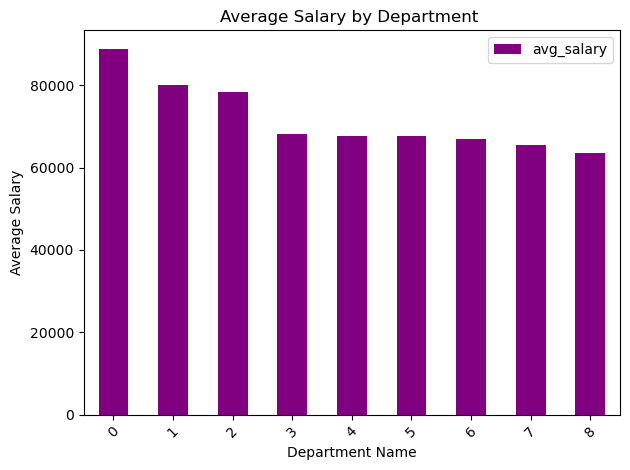

TypeError: 'DataFrame' object is not callable

In [36]:
def get_dept_wise_avg_sal():
    conn = connect_to_DB()
    
    query="""select dept_name, avg(s.amount) as avg_salary from employees.employee e
    join employees.salary s on e.id = s.employee_id
    join employees.department_employee de on e.id = de.employee_id
    join employees.department d on de.department_id = d.id
    where s.to_date = '9999-01-01'
    group by d.dept_name 
    order by avg_salary desc;"""
    
    avg_sal_with_dept = pd.read_sql_query(query,conn)  
    plt.figure(figsize=(10, 6))
    avg_sal_with_dept.plot(kind='bar', color='purple')
    plt.title('Average Salary by Department ')
    plt.xlabel('Department Name')
    plt.ylabel('Average Salary')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    return avg_sal_with_dept(avg_sal_with_dept== max(avg_sal_with_dept)) 
get_dept_wise_avg_sal()

# 3. Which title has the highest avg salary? Give some plots to show the avg salary title-wise.

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\1034495046.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_sal_with_title = pd.read_sql_query(query,conn)


<Figure size 1000x600 with 0 Axes>

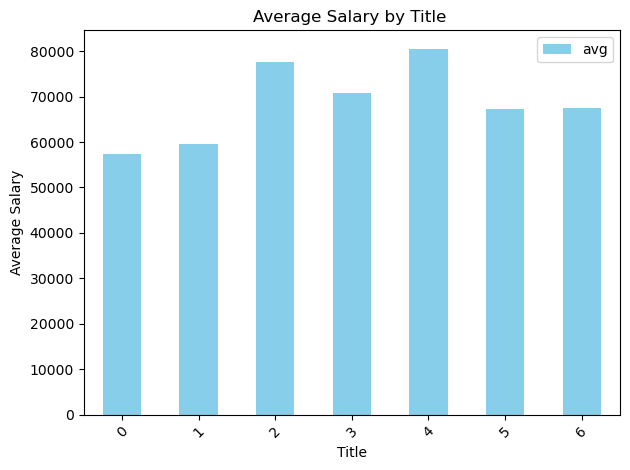

TypeError: 'DataFrame' object is not callable

In [38]:
 def get_title_wise_avg_sal():
    conn = connect_to_DB()
    
    query="""select tab.title,avg(tab.amount) from (select s.amount,t.title from employees.employee e
    left join employees.title t on t.employee_id = e.id
    left join employees.salary s on s.employee_id = e.id
    where date_part('year',s.to_date)=9999
    and date_part('year',t.to_date)=9999) tab group by tab.title; """
    
    avg_sal_with_title = pd.read_sql_query(query,conn)  
    plt.figure(figsize=(10, 6))
    avg_sal_with_title.plot(kind='bar', color='skyblue')
    plt.title('Average Salary by Title ')
    plt.xlabel('Title')
    plt.ylabel('Average Salary')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    return avg_sal_with_title(avg_sal_with_title['avg']== max(avg_sal_with_title['avg'])) 
get_title_wise_avg_sal()

#  Q4. Distribution of salary across titles.

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\366135850.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  all_titles = pd.read_sql_query(get_title_query, conn)['title'].tolist()
C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\366135850.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_df = pd.read_sql_query(query_get_salary, conn, params=(title,))


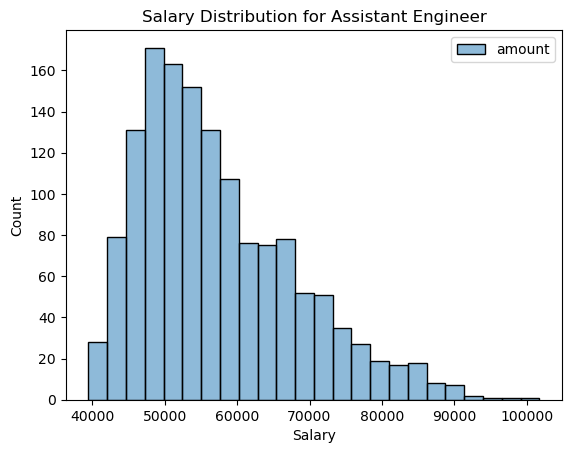

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\366135850.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_df = pd.read_sql_query(query_get_salary, conn, params=(title,))


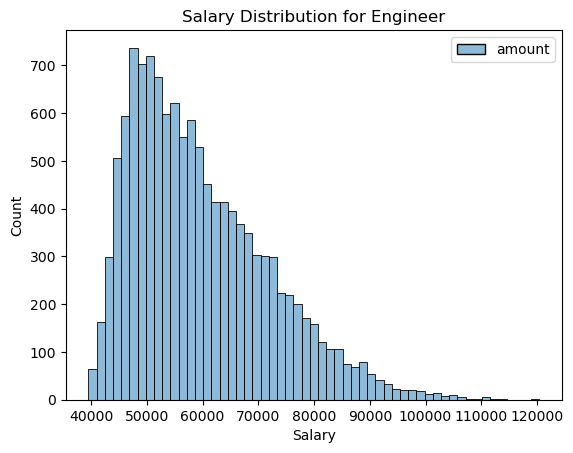

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\366135850.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_df = pd.read_sql_query(query_get_salary, conn, params=(title,))


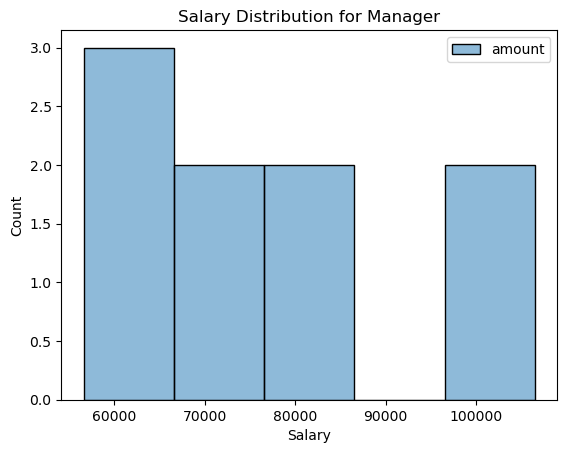

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\366135850.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_df = pd.read_sql_query(query_get_salary, conn, params=(title,))


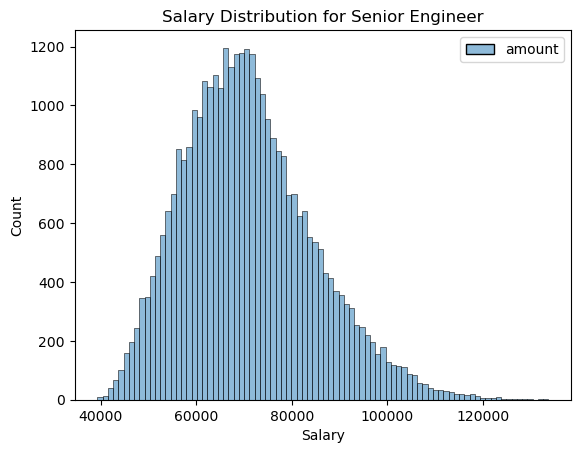

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\366135850.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_df = pd.read_sql_query(query_get_salary, conn, params=(title,))


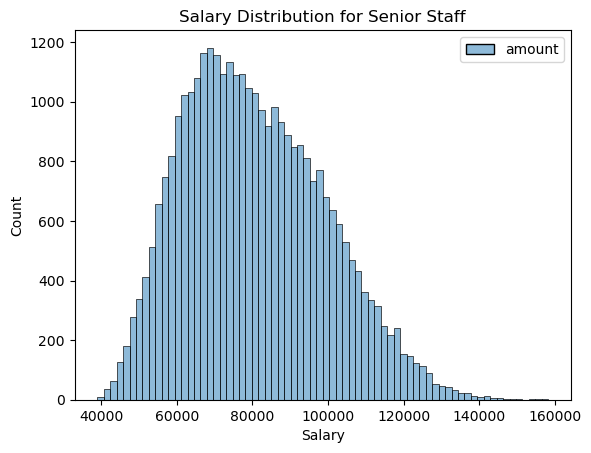

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\366135850.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_df = pd.read_sql_query(query_get_salary, conn, params=(title,))


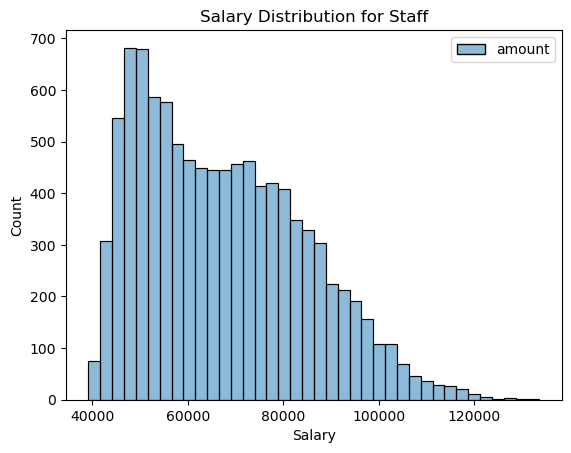

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\366135850.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_df = pd.read_sql_query(query_get_salary, conn, params=(title,))


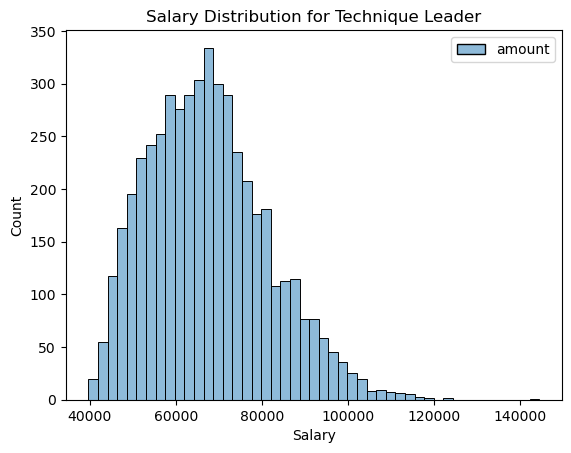

In [41]:

def salary_distri_across_title():
    conn = connect_to_DB()  # Connect to the database

    get_title_query = """SELECT DISTINCT(title) FROM employees.title"""
    all_titles = pd.read_sql_query(get_title_query, conn)['title'].tolist()

    for title in all_titles:
        query_get_salary = """
        SELECT s.amount
        FROM employees.title ti
        LEFT JOIN employees.salary s ON s.employee_id = ti.employee_id
        WHERE date_part('year', ti.to_date) = 9999
        AND date_part('year', s.to_date) = 9999
        AND title = %s
        """
        salary_df = pd.read_sql_query(query_get_salary, conn, params=(title,))

        sns.histplot(salary_df, kde=False)
        plt.title(f"Salary Distribution for {title}")
        plt.xlabel("Salary")
        plt.show()

# Call the function to generate the salary distribution plots
salary_distri_across_title()


C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\4155362580.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  get_salary_across_titles = pd.read_sql_query(query, conn)


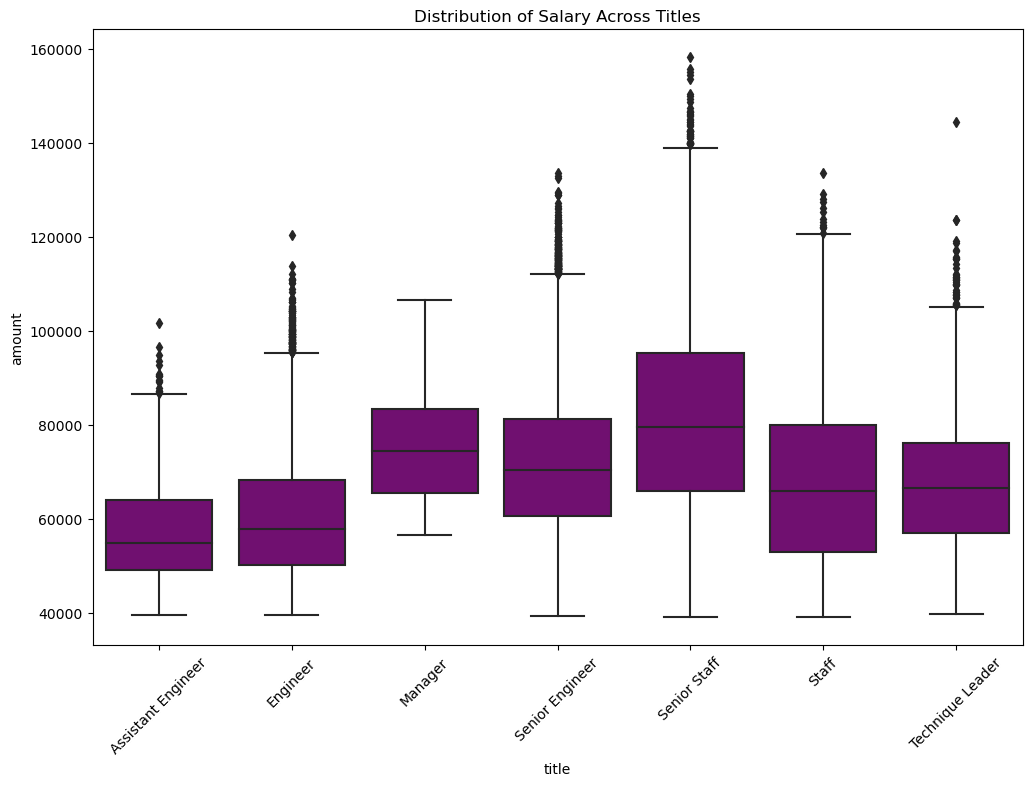

In [63]:
def salary_across_titles():
    conn = connect_to_DB()
    query = """ select ti.title, s.amount from employees.title ti
                left join employees.salary s on ti.employee_id = s.employee_id 
                where date_part('year', ti.to_date) = 9999 and date_part('year', s.to_date) = 9999
                group by ti.title, s.amount"""
    get_salary_across_titles = pd.read_sql_query(query, conn)   
    # Create a box plot to visualize the distribution of salary across titles
    plt.figure(figsize=(12, 8))
    plt.xticks(rotation=45)
    plt.xlabel('Title')
    plt.ylabel('Salary')
    plt.title('Distribution of Salary Across Titles')
    sns.boxplot(x='title', y='amount', data=get_salary_across_titles, color='purple')
    plt.show()
salary_across_titles()    

# Q5. Distribution of salary across departments

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\140043131.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  all_salary = pd.read_sql_query(get_salary_all, conn)


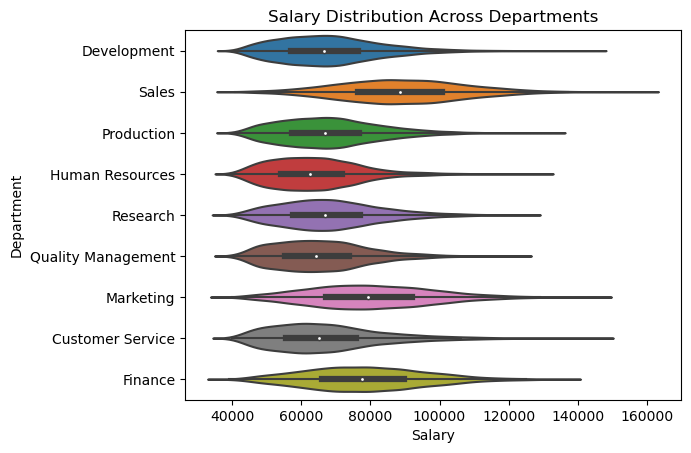

In [42]:

def salary_distri_across_dept():
    conn = connect_to_DB()  # Connect to the database

    get_salary_all = """
    SELECT d.dept_name, s.amount
    FROM employees.salary s
    LEFT JOIN employees.department_employee de ON s.employee_id = de.employee_id
    LEFT JOIN employees.department d ON d.id = de.department_id
    WHERE date_part('year', de.to_date) = 9999
    AND date_part('year', s.to_date) = 9999
    """

    all_salary = pd.read_sql_query(get_salary_all, conn)

    sns.violinplot(data=all_salary, x='amount', y='dept_name')
    plt.xlabel("Salary")
    plt.ylabel("Department")
    plt.title("Salary Distribution Across Departments")
    plt.show()

# Call the function to generate the salary distribution violin plot
salary_distri_across_dept()


# Q6. How many active managers in each department. Is there any department with no manager?

In [48]:
def active_manager_in_department():
    conn = connect_to_DB()
    # SQL query to count active managers in each department
    query_active_mgr = """ select d.dept_name, count(dm.employee_id) as manager_counts from employees.department d
            left join employees.department_manager dm on d.id = dm.department_id
            left join employees.employee e on dm.employee_id = e.id
            where date_part('year', dm.to_date) = 9999
            group by d.dept_name """
    get_active_manager = pd.read_sql_query(query_active_mgr, conn)
    # Print the counts of active managers in each department
    print("Number of Active Managers in Each Department:")
    print(get_active_manager)
    # SQL query to check for departments with no manager
    department_with_no_mgr = """ select d.dept_name from employees.department d
                                left join employees.department_manager dm on d.id = dm.department_id
                                where dm.employee_id isnull """
    getdepartment_with_no_manager = pd.read_sql_query(department_with_no_mgr, conn)
    # Print whether there are departments with no manager
    if not getdepartment_with_no_manager.empty:
        print("\nDepartments with No Manager:")
        print(departments_without_manager_df)
    else:
        print("\nAll departments have at least one active manager.")
active_manager_in_department()        

Number of Active Managers in Each Department:
            dept_name  manager_counts
0    Customer Service               1
1         Development               1
2             Finance               1
3     Human Resources               1
4           Marketing               1
5          Production               1
6  Quality Management               1
7            Research               1
8               Sales               1

All departments have at least one active manager.


C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\1236840552.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  get_active_manager = pd.read_sql_query(query_active_mgr, conn)
C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\1236840552.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  getdepartment_with_no_manager = pd.read_sql_query(department_with_no_mgr, conn)


# Q7. Composition of titles department-wise. Appropriate plots

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\1320693183.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  title_dept_df = pd.read_sql_query(get_title_dept, conn)


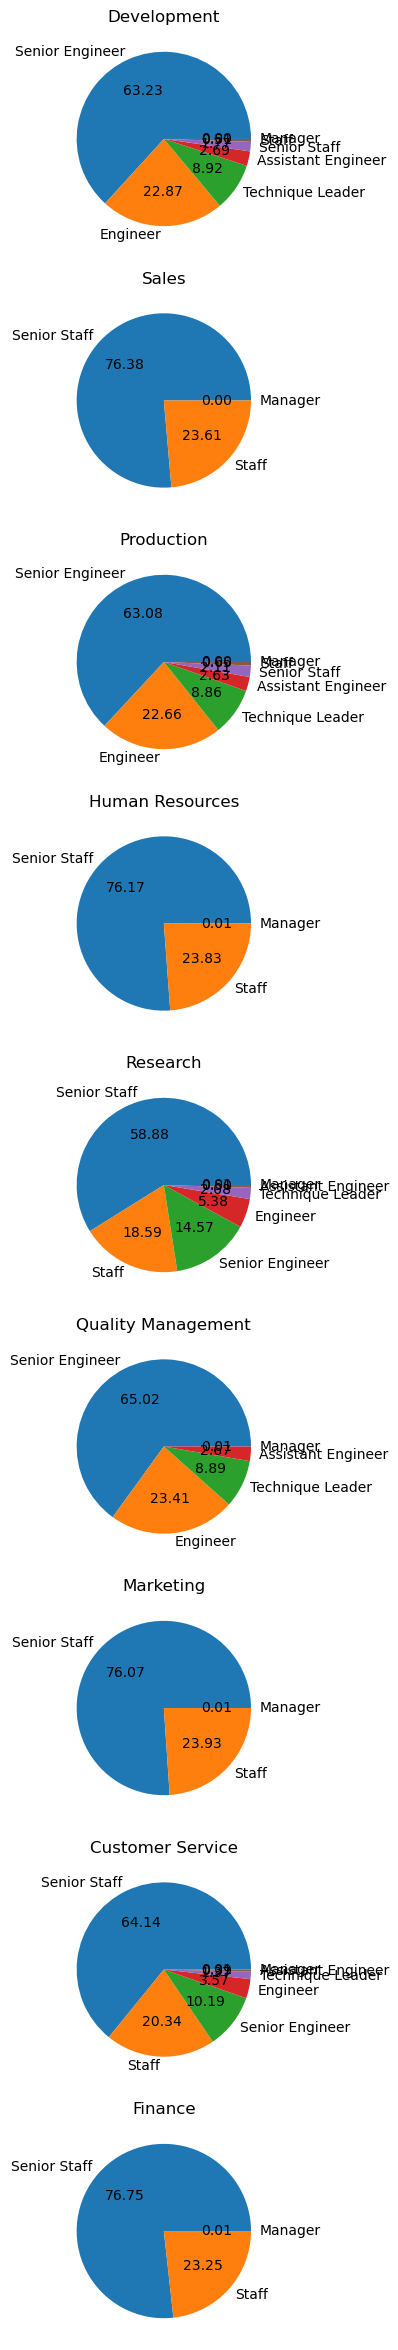

The job title with the highest count is: Senior Engineer


In [49]:

def title_composition_dept_wise():
    conn = connect_to_DB()  # Connect to the database

    get_title_dept = """
    SELECT t.title, d.dept_name
    FROM employees.title t
    LEFT JOIN employees.department_employee de ON de.employee_id = t.employee_id
    LEFT JOIN employees.department d ON d.id = de.department_id 
    WHERE date_part('year', de.to_date) = 9999
    AND date_part('year', t.to_date) = 9999
    """

    title_dept_df = pd.read_sql_query(get_title_dept, conn)

    # Create a subplot for pie charts
    fig, axes = plt.subplots(nrows=len(title_dept_df['dept_name'].unique()), figsize=(100, 30))

    for i, dept_name in enumerate(title_dept_df['dept_name'].unique()):
        df = title_dept_df[title_dept_df['dept_name'] == dept_name]
        title_counts = df['title'].value_counts()
        ax = axes[i]
        ax.pie(title_counts, labels=title_counts.index, autopct='%.2f')
        ax.set_title(dept_name)

    #plt.tight_layout()
    plt.show()

    max_title_dept = title_dept_df['title'].value_counts().idxmax()
    return max_title_dept

# Call the function to generate the plots
max_title = title_composition_dept_wise()
print(f"The job title with the highest count is: {max_title}")


# Q8. Composition of departments title-wise. Appropriate plots.

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\3611401190.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dept_title_df = pd.read_sql_query(get_dept_title, conn)


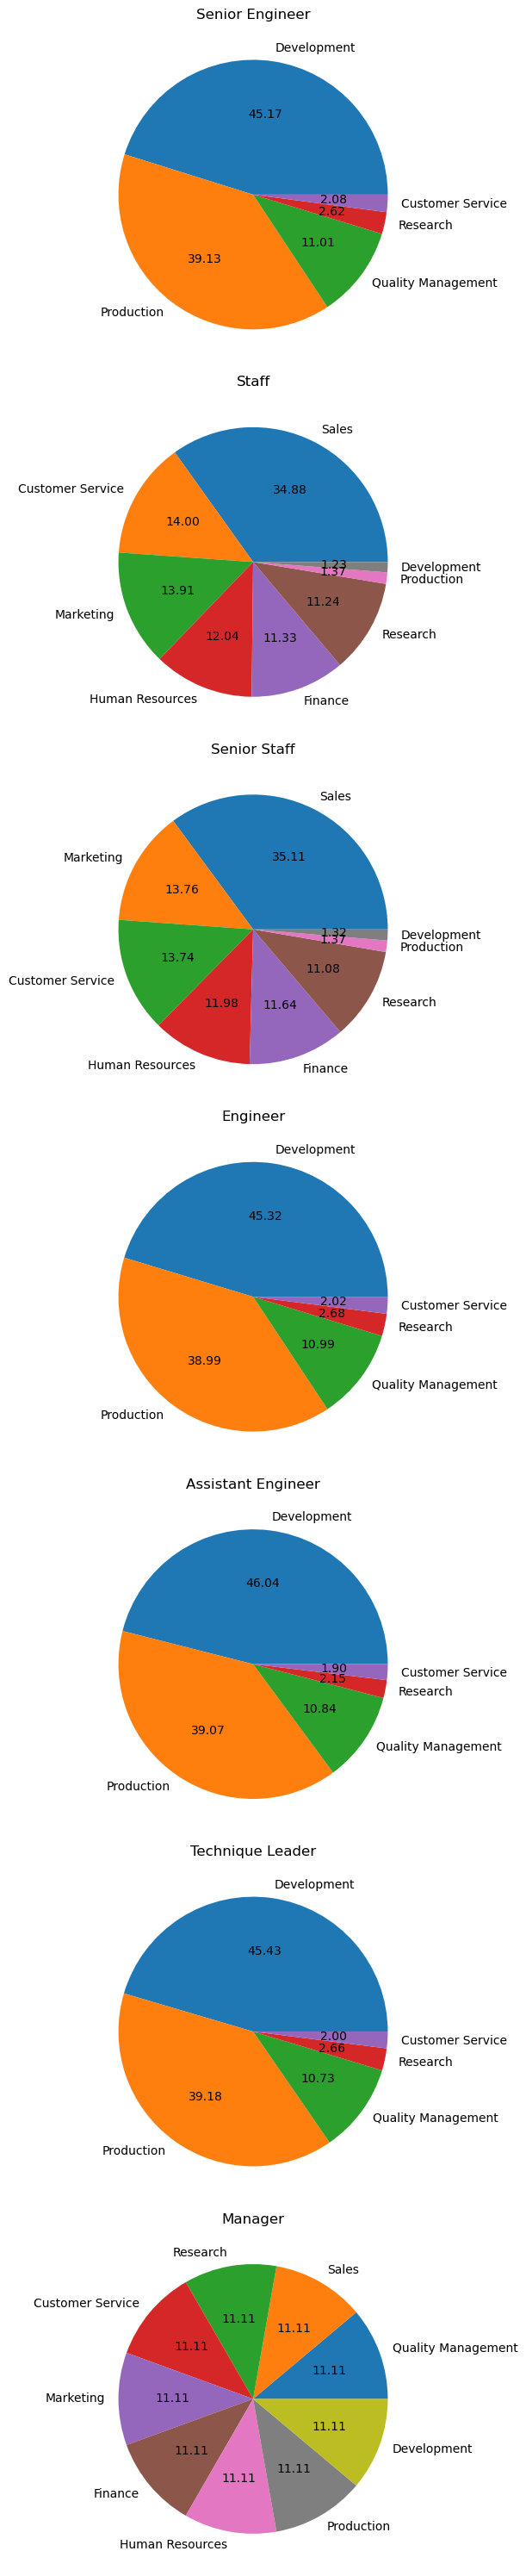

The department with the most employees with the highest title is: Senior Engineer


In [50]:

def dept_composition_title_wise():
    conn = connect_to_DB()  # Connect to the database

    get_dept_title = """
    SELECT t.title, d.dept_name
    FROM employees.title t
    LEFT JOIN employees.department_employee de ON de.employee_id = t.employee_id
    LEFT JOIN employees.department d ON d.id = de.department_id 
    WHERE date_part('year', de.to_date) = 9999
    AND date_part('year', t.to_date) = 9999
    """

    dept_title_df = pd.read_sql_query(get_dept_title, conn)

    # Create a subplot for pie charts
    fig, axes = plt.subplots(nrows=len(dept_title_df['title'].unique()), figsize=(100, 30))

    for i, title in enumerate(dept_title_df['title'].unique()):
        df = dept_title_df[dept_title_df['title'] == title]
        dept_counts = df['dept_name'].value_counts()
        ax = axes[i]
        ax.pie(dept_counts, labels=dept_counts.index, autopct='%.2f')
        ax.set_title(title)

    plt.tight_layout()  # This helps to adjust the layout of subplots
    plt.show()

    max_title_dept = dept_title_df['title'].value_counts().idxmax()
    return max_title_dept

# Call the function to generate the plots
max_title = dept_composition_title_wise()
print(f"The department with the most employees with the highest title is: {max_title}")


# Q9. Salaries of active department managers. Which department's manager who is active earns the most?

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\3851356945.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dept_manager_salary_df = pd.read_sql_query(get_manager_salries_dept_wise_query,conn)


,dept_name,amount
0,Marketing,106491


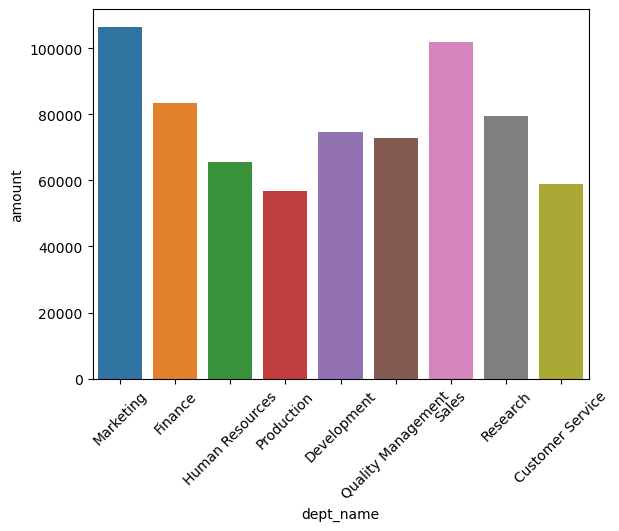

In [51]:
def dept_manager_salaries():
    
    conn = connect_to_DB()

    get_manager_salries_dept_wise_query="""
    select d.dept_name, s.amount from employees.department_manager dm
    inner join employees.salary s on dm.employee_id = s.employee_id
    inner join employees.department d on d.id = dm.department_id
    where date_part('year',dm.to_date) = 9999 and date_part('year',s.to_date)=9999
    """
    dept_manager_salary_df = pd.read_sql_query(get_manager_salries_dept_wise_query,conn)
    
    my_plot = sns.barplot(x=dept_manager_salary_df['dept_name'], y=dept_manager_salary_df['amount'])
    
    for item in my_plot.get_xticklabels():
        item.set_rotation(45)
    return dept_manager_salary_df[dept_manager_salary_df['amount']== max(dept_manager_salary_df['amount'])] 
dept_manager_salaries()

# Q10. What are the titles of active department managers? Are they managers only?

In [53]:
def titles_active_dept_manager():
    conn = connect_to_DB()
    query = """ select d.dept_name, tit.title from employees.department_manager dm
            join employees.title tit on dm.employee_id = tit.employee_id
            join employees.department d on d.id = dm.Department_id
            where date_part('year', dm.to_date) = 9999 and date_part('year', tit.to_date) = 9999 """
    get_active_depmgr_title = pd.read_sql_query(query, conn)
    df = pd.DataFrame(get_active_depmgr_title)
    print(df.head())
    print('\n Check if there are any titles other than manager :- \n')
    only_managers = get_active_depmgr_title['title'].nunique() == 1
    if only_managers:
        print("All active department managers have the title 'manager'.")
    else:
        print("Active department managers have titles other than 'manager' as well.")
titles_active_dept_manager()        

         dept_name    title
0        Marketing  Manager
1          Finance  Manager
2  Human Resources  Manager
3       Production  Manager
4      Development  Manager

 Check if there are any titles other than manager :- 

All active department managers have the title 'manager'.


C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\1257161979.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  get_active_depmgr_title = pd.read_sql_query(query, conn)


# Q11. Past history of salaries of managers across department (yearly)

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\3368090113.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


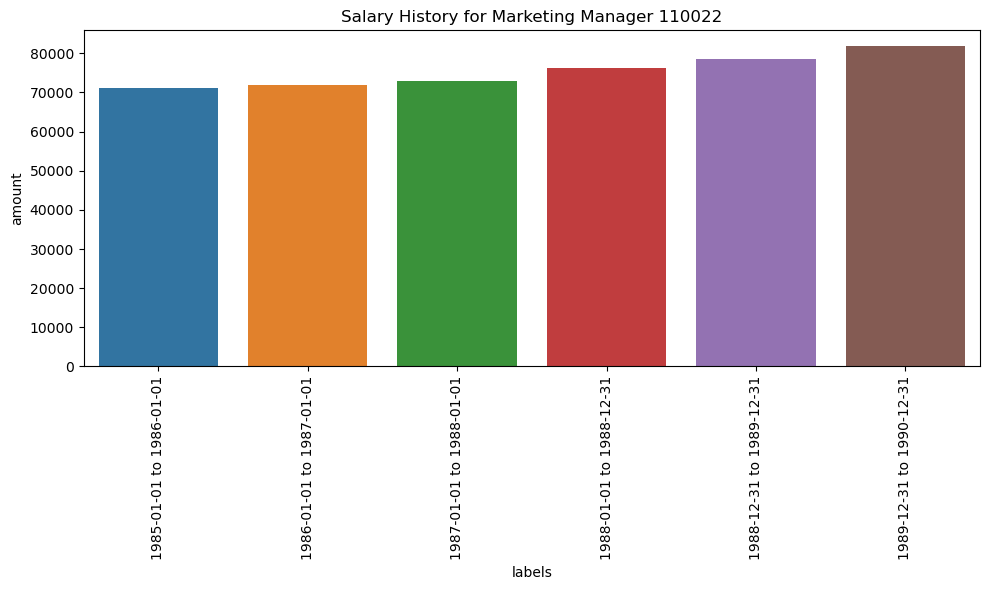

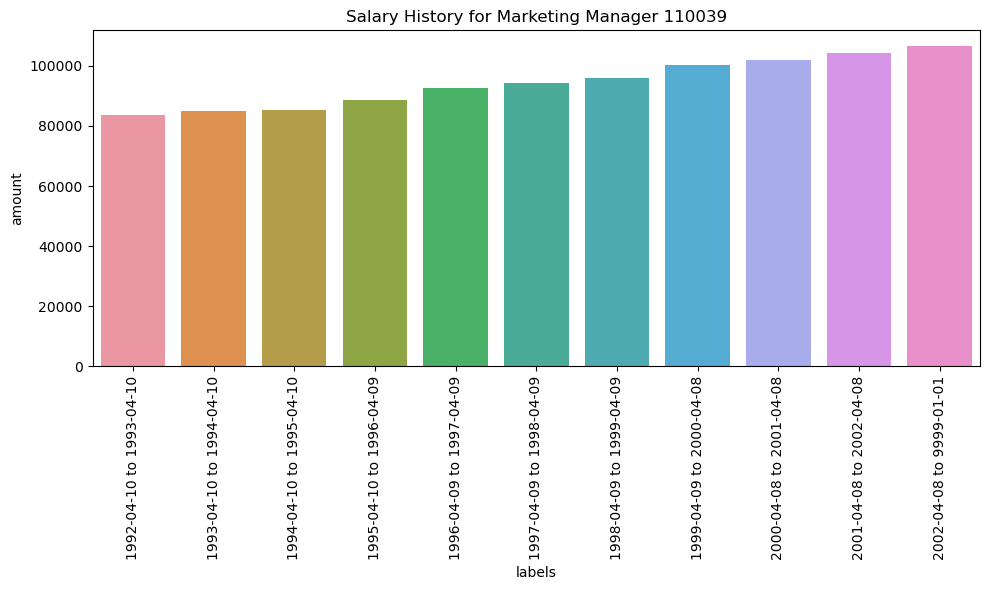

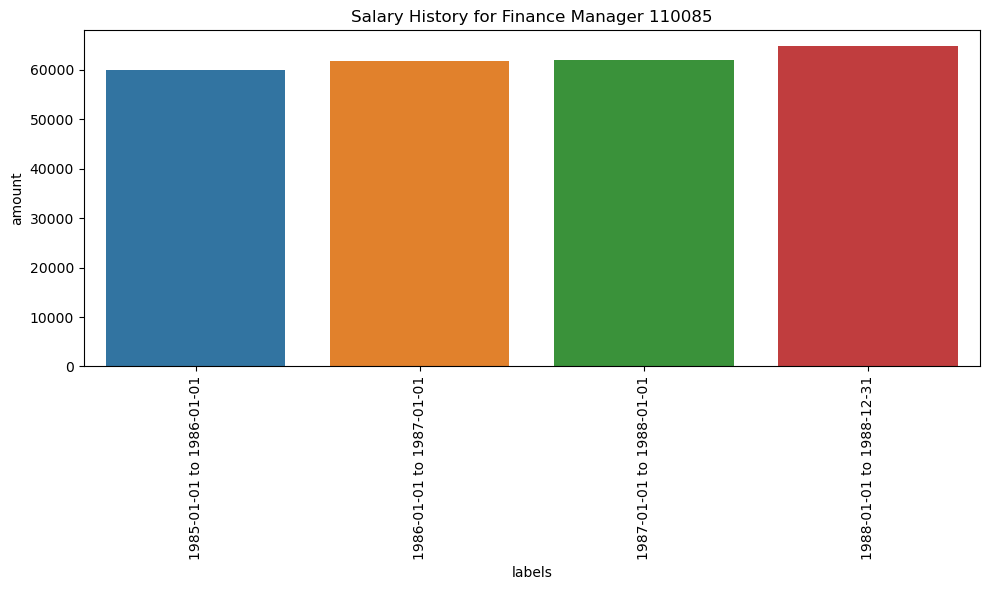

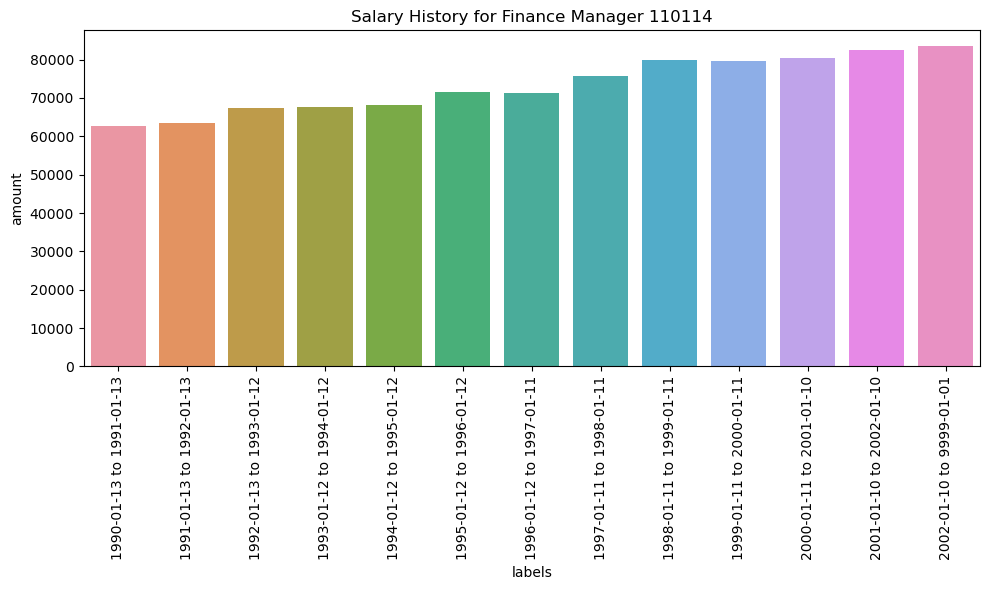

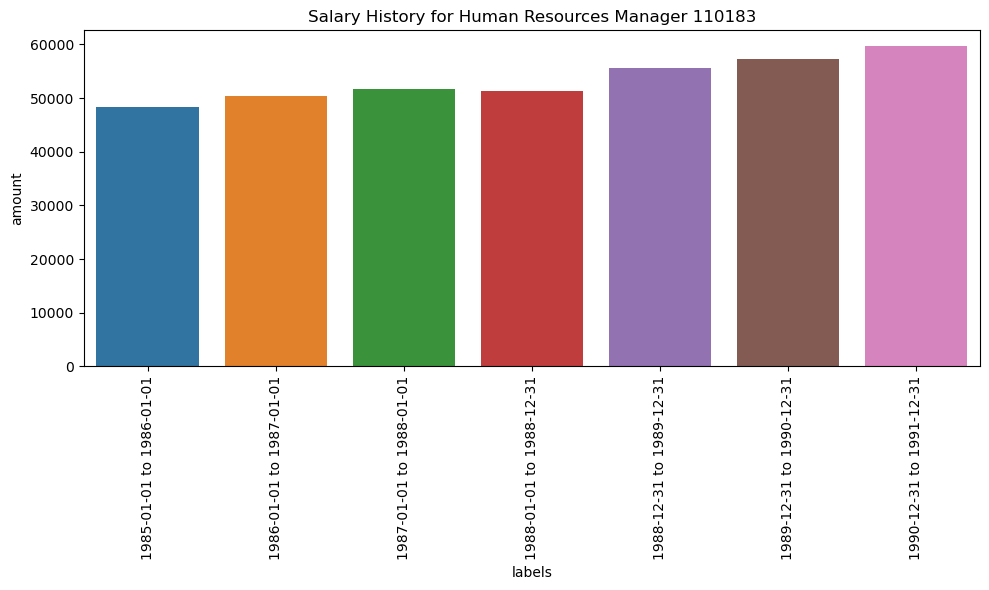

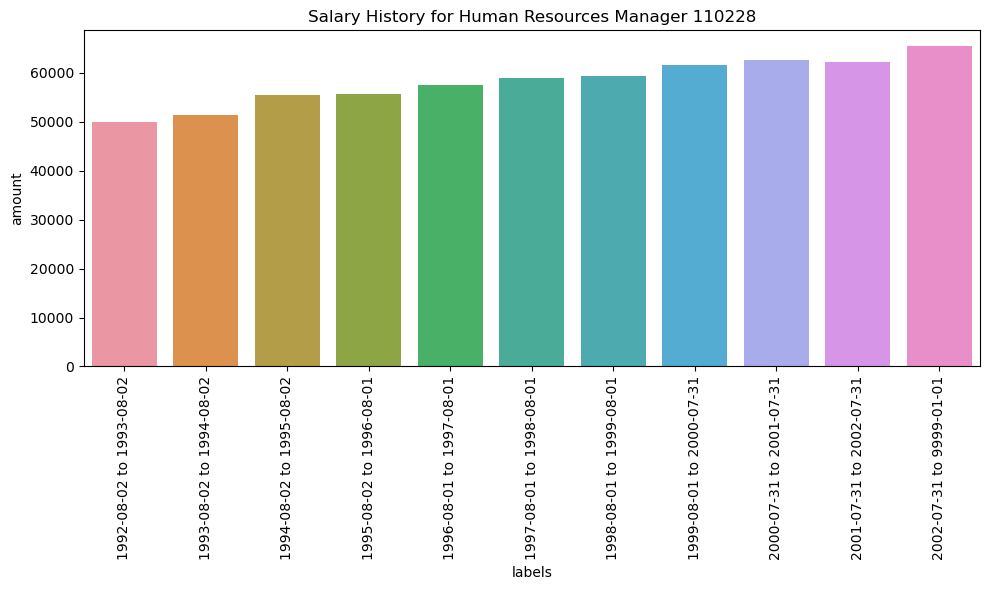

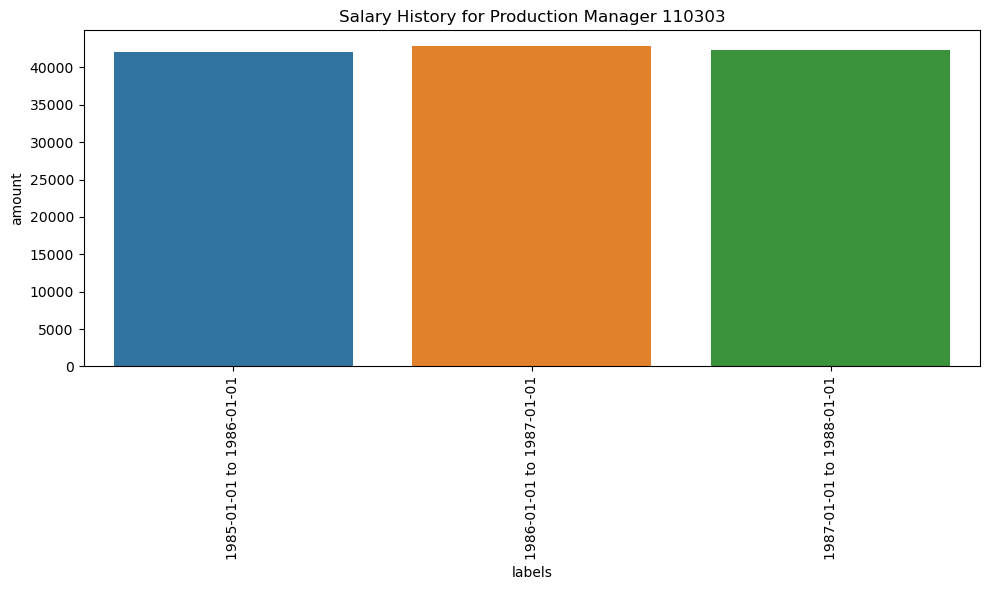

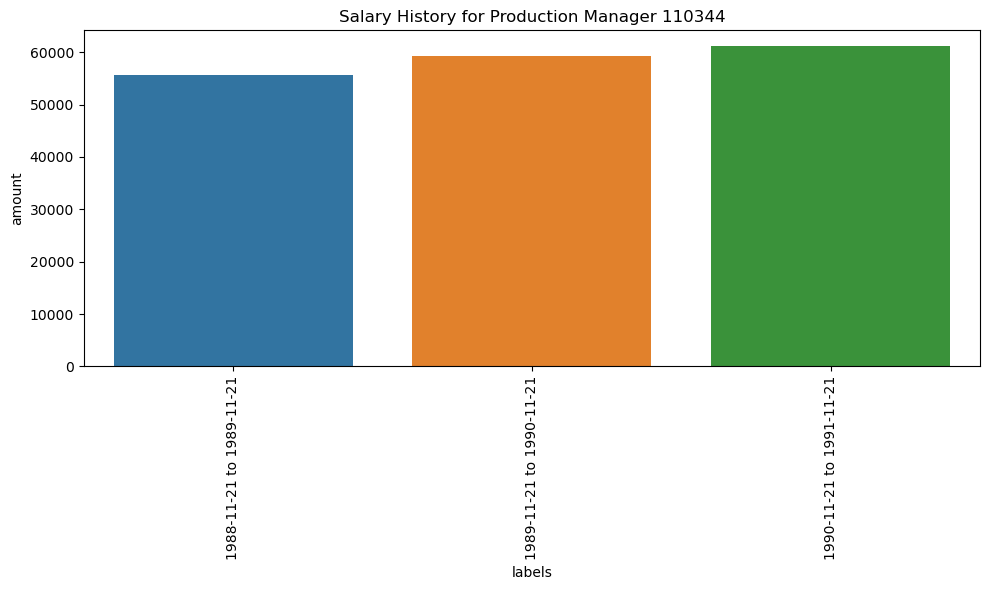

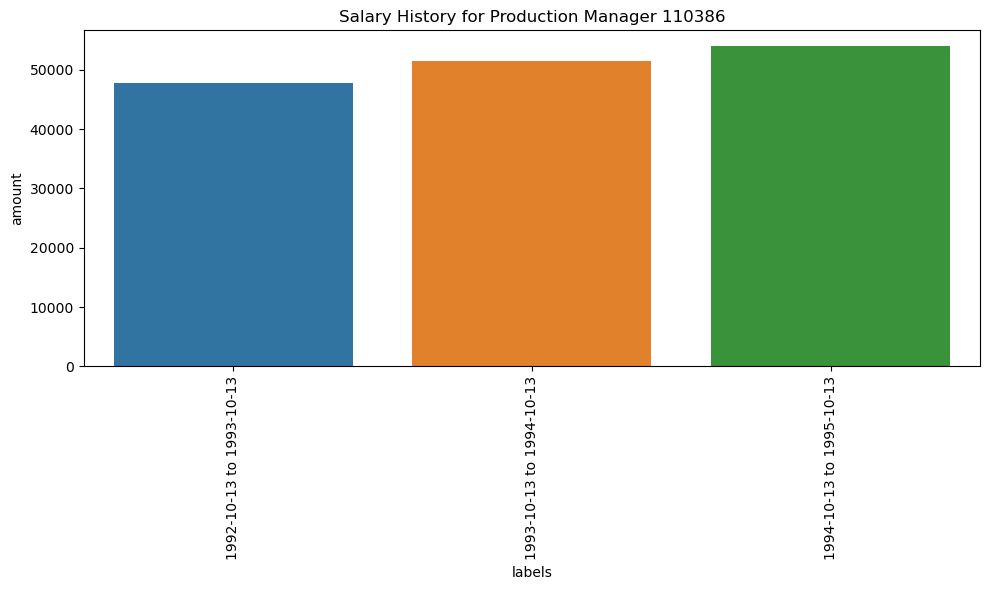

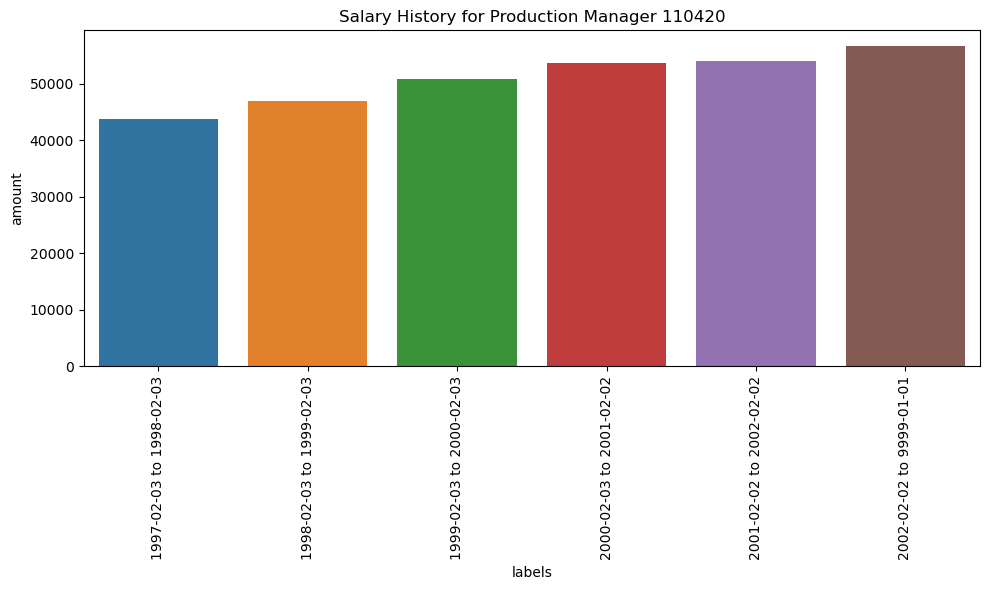

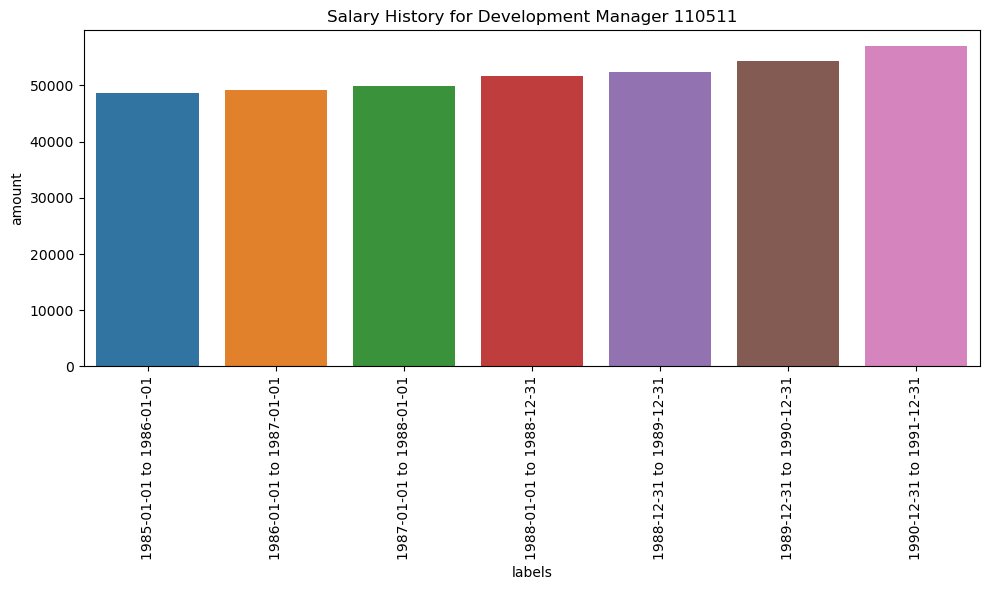

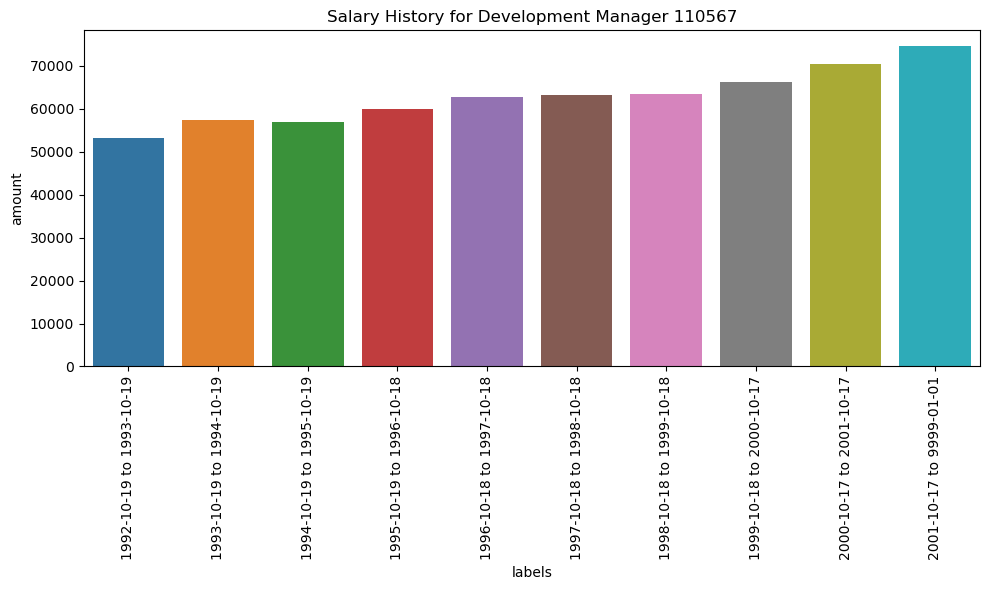

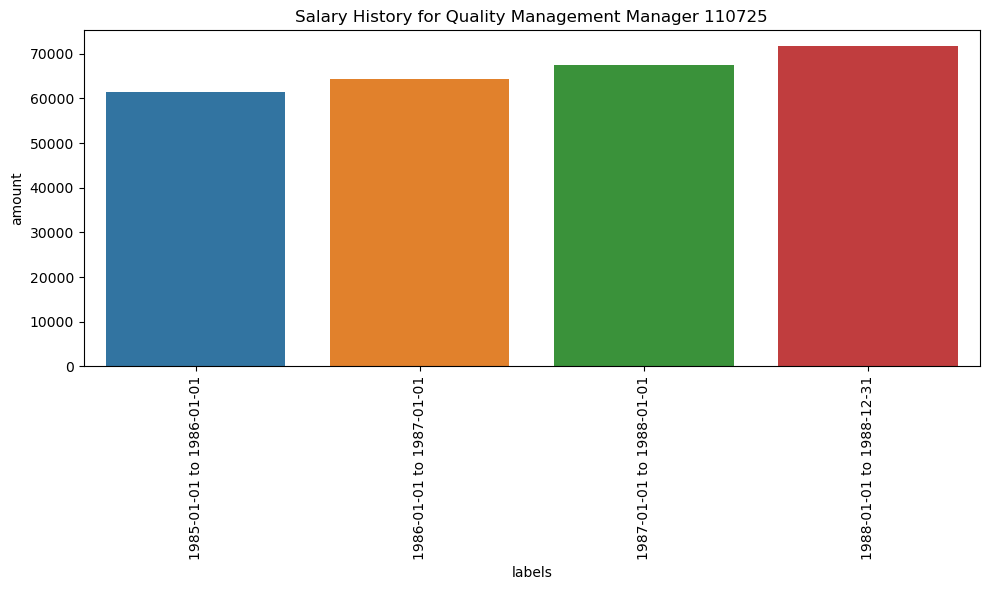

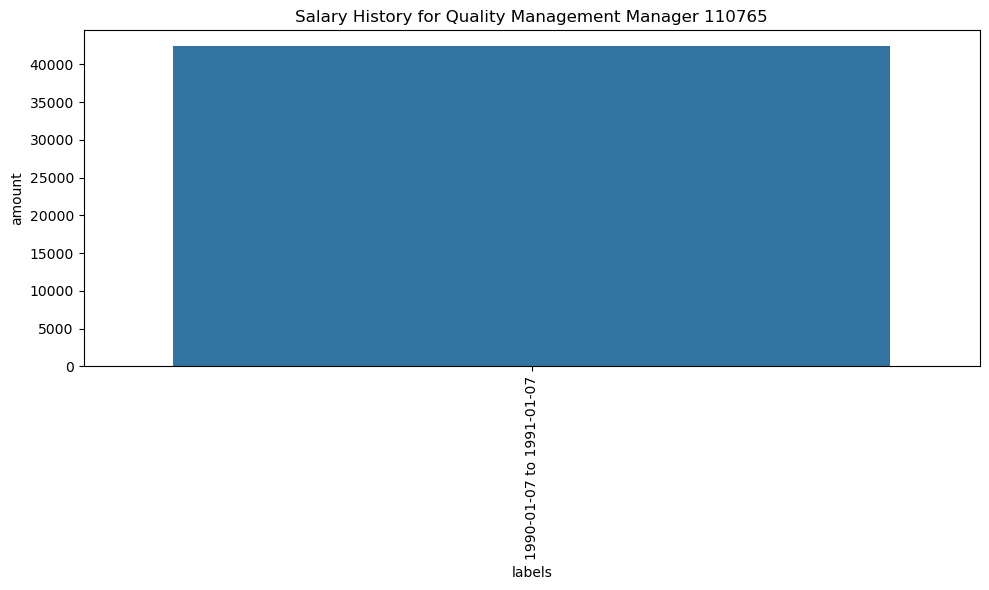

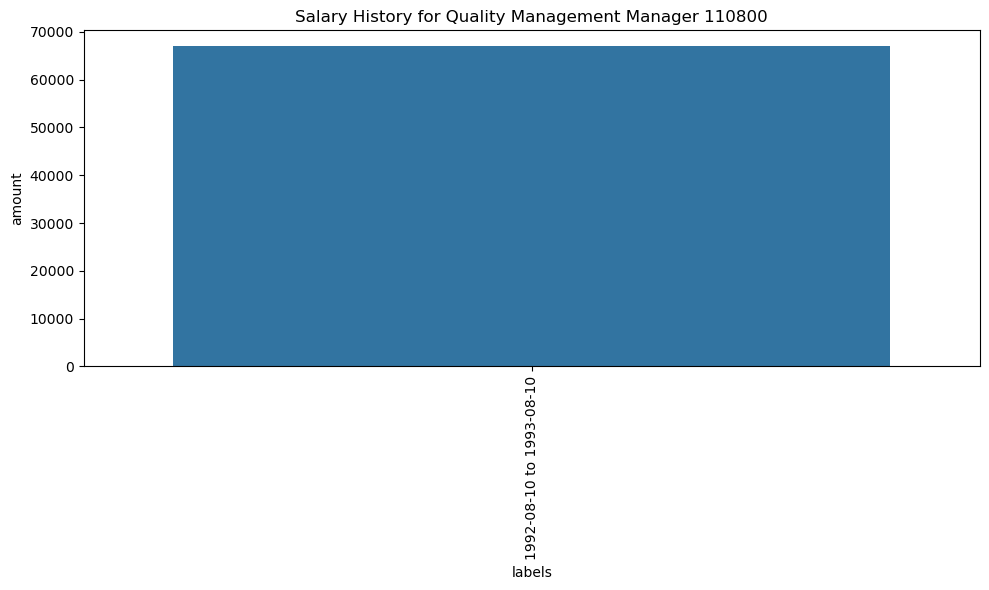

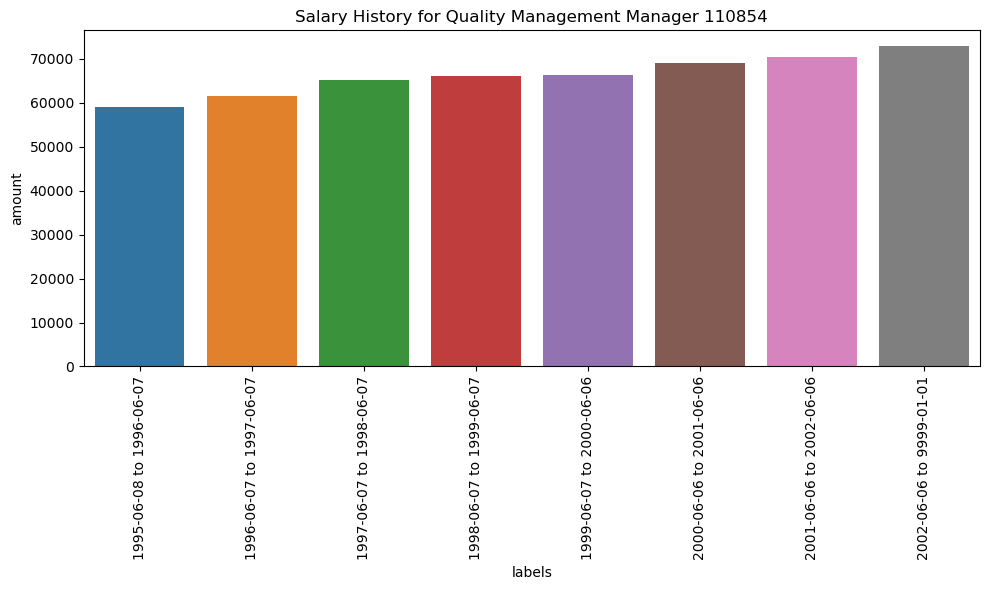

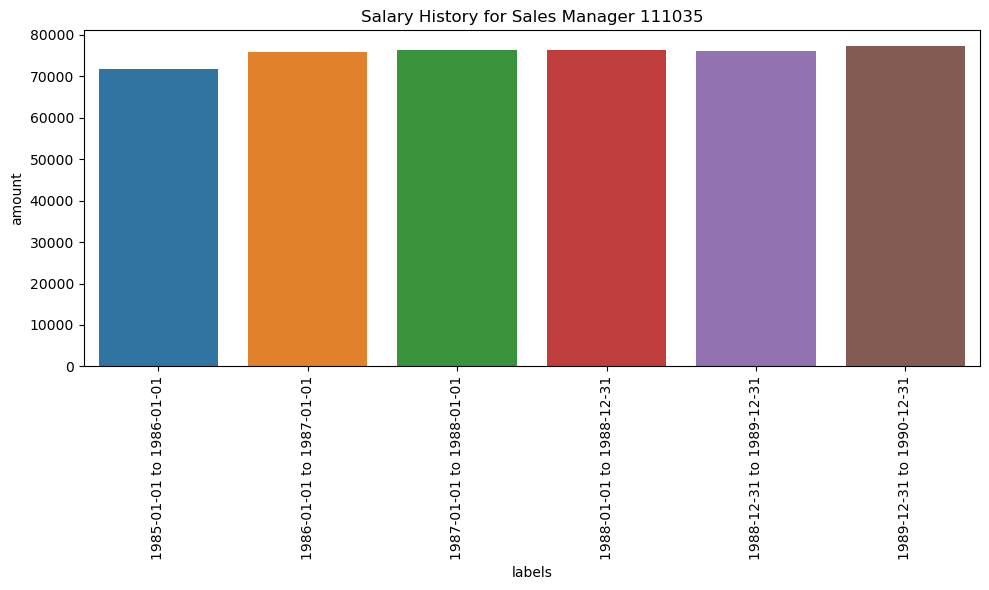

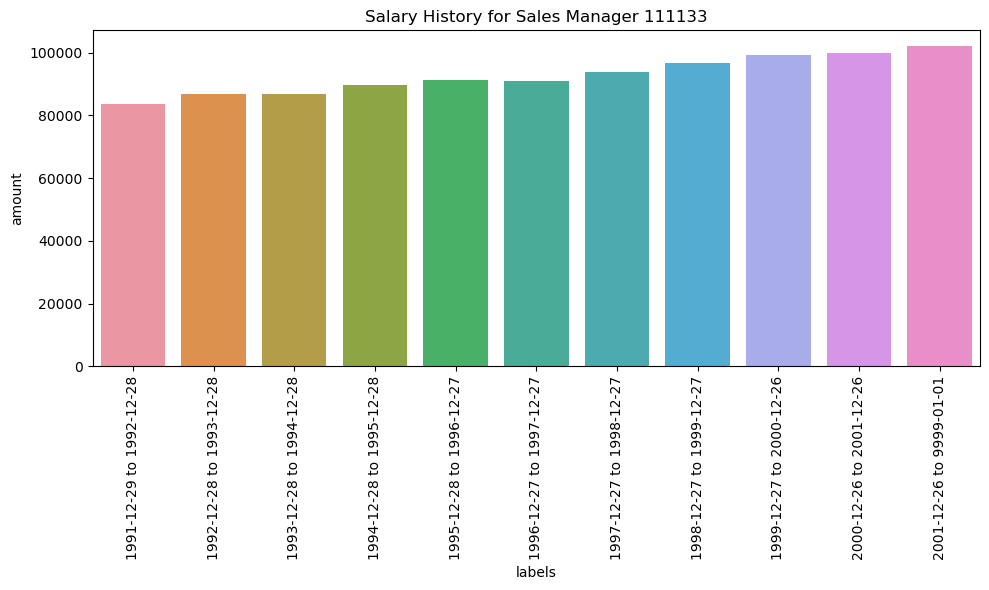

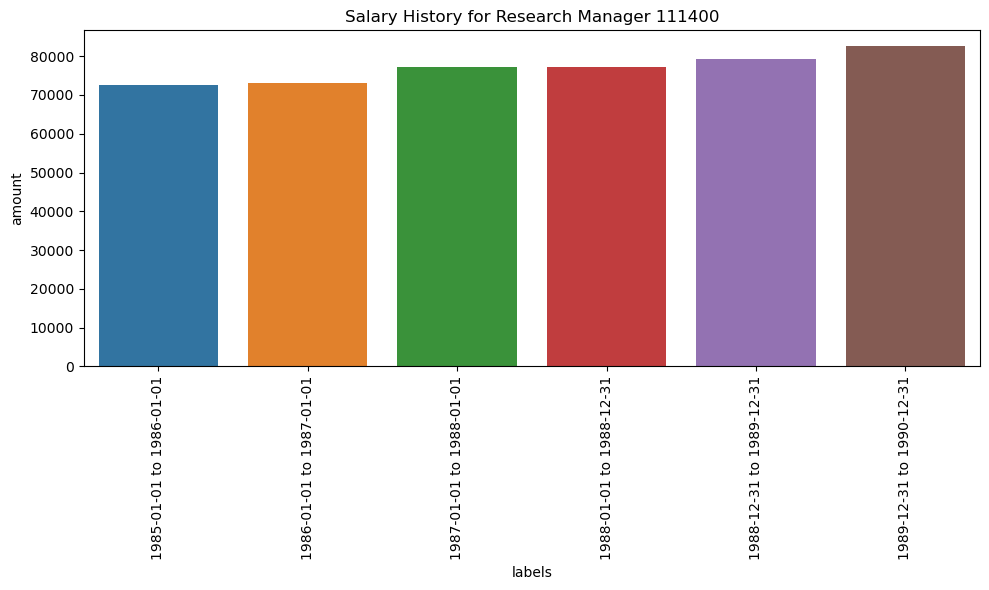

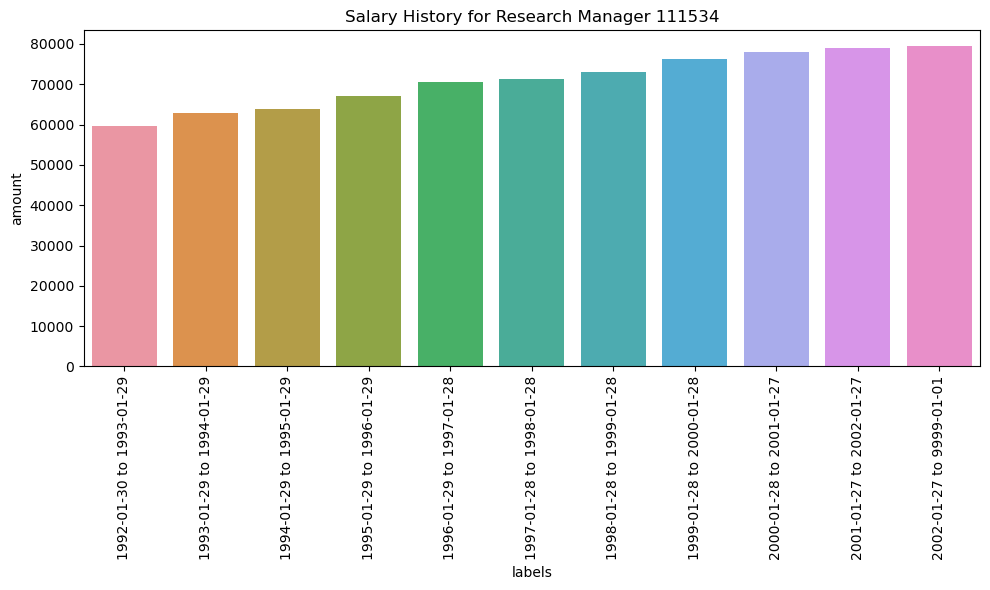

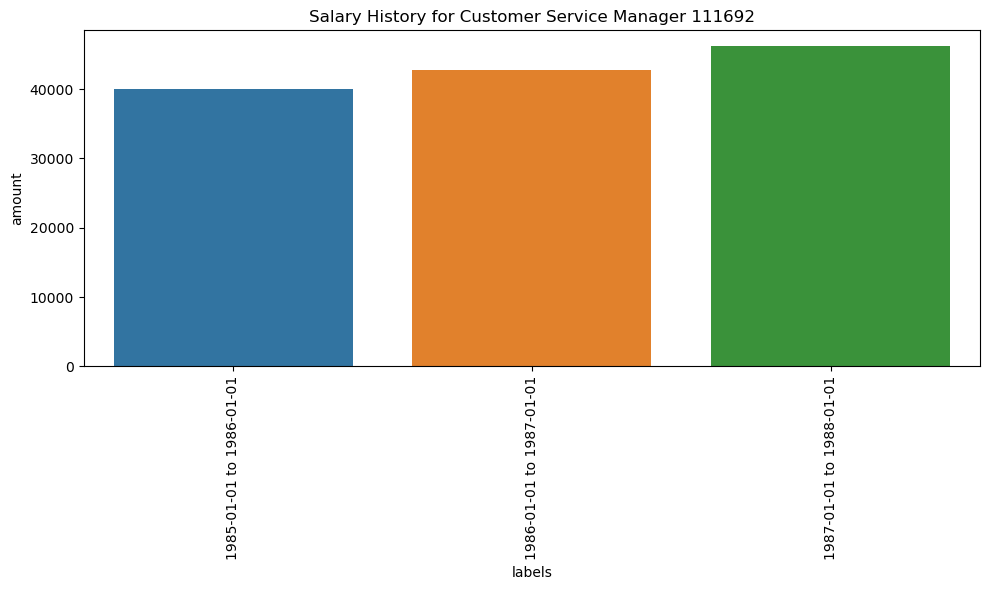

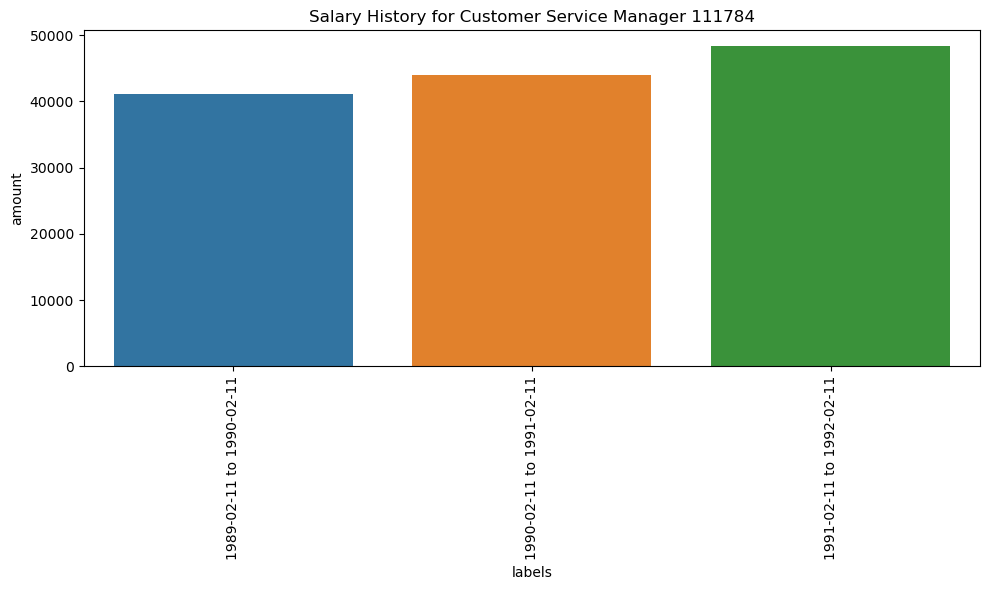

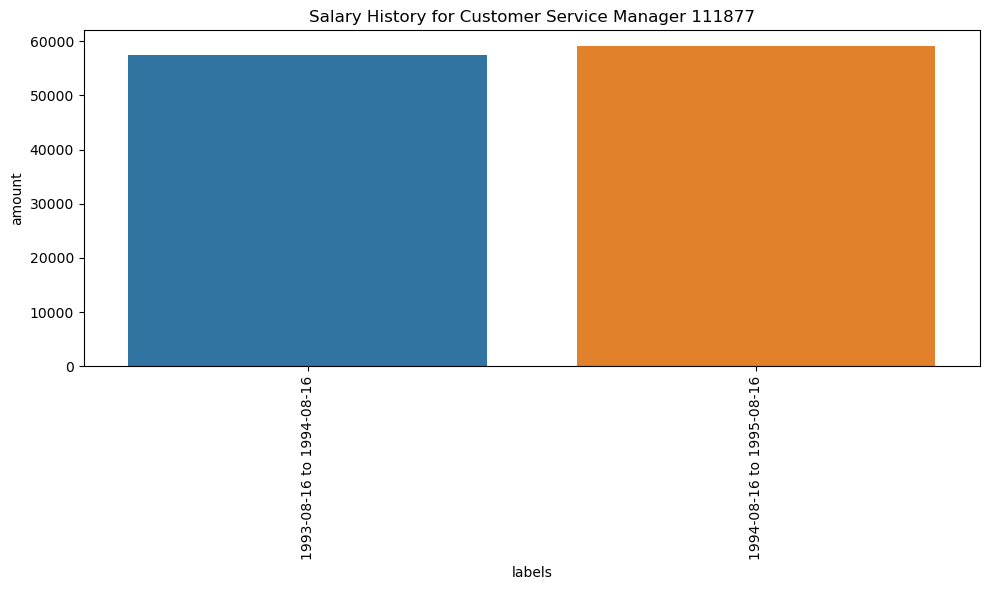

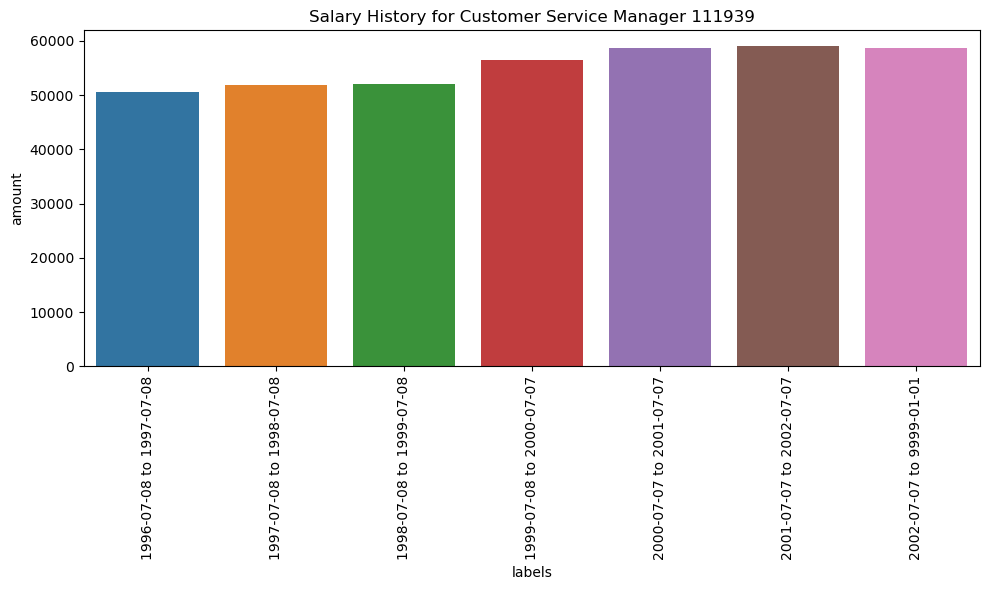

In [54]:

def hist_sal_manager_across_dept():
    conn = connect_to_DB()
    
    query = """
    SELECT dm.employee_id, d.dept_name, s.amount, s.from_date, s.to_date
    FROM employees.department_manager dm
    JOIN employees.salary s ON dm.employee_id = s.employee_id
    JOIN employees.department d ON d.id = dm.department_id
    WHERE s.from_date >= dm.from_date AND s.to_date <= dm.to_date
    """
    
    df = pd.read_sql_query(query, conn)
    conn.close()

    # Convert from_date and to_date to strings for labels
    df['labels'] = df['from_date'].apply(str) + ' to ' + df['to_date'].apply(str)

    # Get unique department names and employee IDs
    depts = df['dept_name'].unique()
    employees_managers = df['employee_id'].unique()

    for dept in depts:
        for manager in employees_managers:
            new_df = df[(df['dept_name'] == dept) & (df['employee_id'] == manager)]
            if not new_df.empty:
                plt.figure(figsize=(10, 6))
                my_plot = sns.barplot(x='labels', y='amount', data=new_df)
                for i in my_plot.get_xticklabels():
                    i.set_rotation(90)
                plt.title(f'Salary History for {dept} Manager {manager}')
                plt.tight_layout()
                plt.show()
            else:
                continue

# Call the function to execute the SQL query and plot the results
hist_sal_manager_across_dept()


# Q12. Distribution of salaries of active employees working for more than 10 years vs 4 years vs 1 year

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\3466724577.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


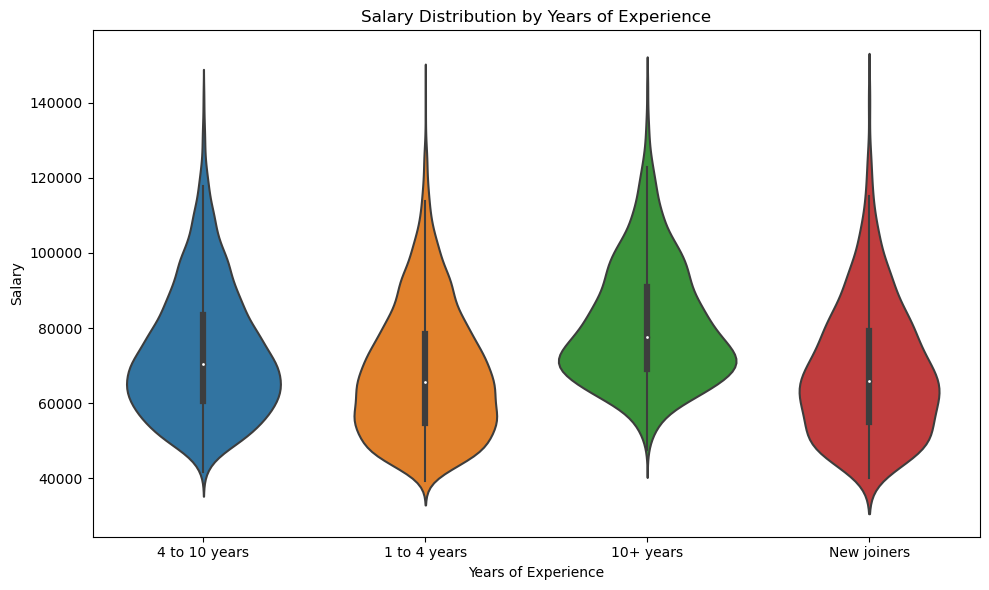

In [55]:

def get_salary_dist_exp_wise():
    conn = connect_to_DB()
    query = """
    SELECT s.amount, date_part('year', de.to_date) - date_part('year', de.from_date) AS exp
    FROM employees.department_employee de
    JOIN employees.salary s ON s.employee_id = de.employee_id
    WHERE date_part('year', de.to_date) - date_part('year', de.from_date) <= 60 
    AND date_part('year', s.to_date) = 9999
    """
    df = pd.read_sql_query(query, conn)
    conn.close()

    df['exp'] = df['exp'].astype('int')

    # Map experience to categories
    def exp_mapper(x):
        if x >= 10:
            return '10+ years'
        elif x >= 4:
            return '4 to 10 years'
        elif x >= 1:
            return '1 to 4 years'
        else:
            return 'New joiners'

    df['exp_status'] = df['exp'].apply(lambda x: exp_mapper(x)) 

    # Create a violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='exp_status', y='amount', data=df)
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.title('Salary Distribution by Years of Experience')
    plt.tight_layout()

    # Show the plot
    plt.show()

# Call the function to execute the SQL query and plot the results
get_salary_dist_exp_wise()


C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\1315074677.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


              service_category  salary
0  Less than 1 year experience   66419
1           More than 10 years   72497
2                 1 to 4 years   42646
3                4 to 10 years   67049
4           More than 10 years   75141


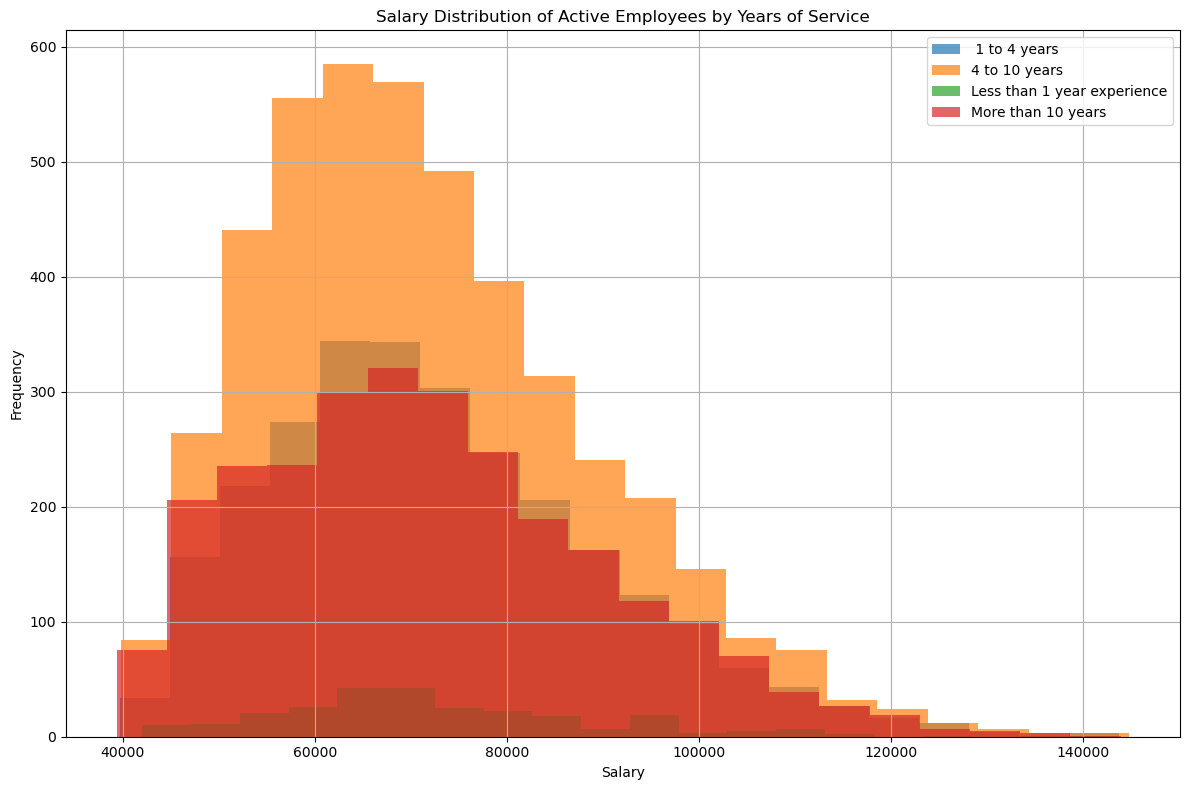

In [59]:
def get_salary_dist_expwise():
    conn = connect_to_DB()
    query = """ with active_employee as (
                	select e.id, s.amount as salary, date_part('year', de.to_date) - date_part('year', e.hire_date) as year_of_experience
                	from employees.employee e join employees.department_employee de on e.id = de.employee_id
                	join employees.salary s on e.id = s.employee_id
                	where s.to_date = '9999-01-01' and date_part('year', de.to_date) - date_part('year', e.hire_date) <= 60
                )
                select 
                	case
                		when year_of_experience > 10 then 'More than 10 years'
                    	when year_of_experience > 4 then '4 to 10 years'
                    	when year_of_experience >= 1 then ' 1 to 4 years'
                        else 'Less than 1 year experience'
                    end as service_category,
                	salary
                from active_employee  """
    df = pd.read_sql_query(query, conn)
    print(df.head())
    # Create a histogram to visualize the salary distribution for each service category
    plt.figure(figsize=(12, 8))
    for category, data in df.groupby('service_category'):
        plt.hist(data['salary'], bins=20, alpha=0.7, label=category)

    plt.xlabel('Salary')
    plt.ylabel('Frequency')
    plt.title('Salary Distribution of Active Employees by Years of Service')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
get_salary_dist_expwise()    

# Q13. Average number of years employees work in the company before leaving (title wise).

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\108635533.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


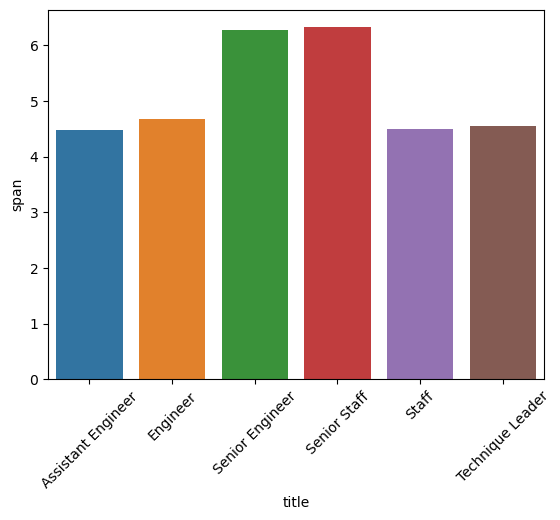

In [56]:
import seaborn as sns

def avg_year_in_company_title_wise():
    connection = connect_to_DB()
    
    
    query="""select ti.title,date_part('year',de.to_date)- date_part('year',de.from_date)
    as span from employees.department_employee de
    join employees.title ti on ti.employee_id = de.employee_id
    where date_part('year',de.to_date) != 9999"""
    
    # Execute the SQL query and load the results into a DataFrame
    df = pd.read_sql_query(query, connection)
    
    # Convert the 'span' column to integer
    df['span'] = df['span'].astype(int)
    
    # Calculate the average years in the company grouped by title
    avg_years_by_title = df.groupby('title')['span'].mean().reset_index()
    
    # Create a bar plot
    plot = sns.barplot(x='title', y='span', data=avg_years_by_title)
    
    # Rotate the x-axis labels for better readability
    for i in plot.get_xticklabels():
        i.set_rotation(45)

    # Show the plot
    plt.show()
    
    # Close the database connection
    connection.close()

# Call the function to run the analysis and plot the results
avg_year_in_company_title_wise()


# Q14. Average number of years employees work in the company before leaving (Dept wise)

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\1318441591.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


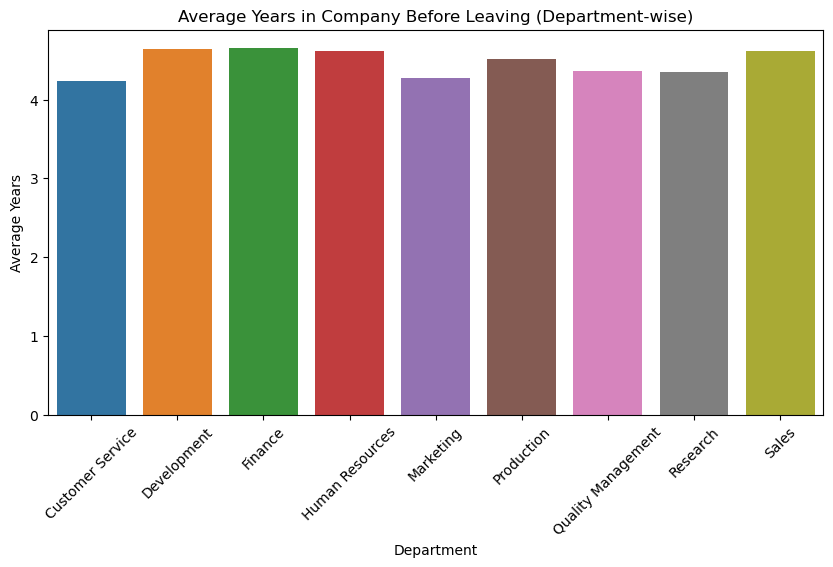

In [57]:

def avg_year_in_company_department_wise():
    conn = connect_to_DB()  # Connect to the database

    query = """
    SELECT d.dept_name, date_part('year', de.to_date) - date_part('year', de.from_date) AS span
    FROM employees.department_employee de
    JOIN employees.department d ON d.id = de.department_id
    WHERE date_part('year', de.to_date) != 9999
    """

    df = pd.read_sql_query(query, conn)
    df['span'] = df['span'].astype('int')
    avg_span = df.groupby('dept_name')['span'].mean().reset_index()

    # Create a bar plot for average years in each department
    plt.figure(figsize=(10, 5))
    plot = sns.barplot(x='dept_name', y='span', data=avg_span)
    plt.title("Average Years in Company Before Leaving (Department-wise)")
    plt.xlabel("Department")
    plt.ylabel("Average Years")
    plt.xticks(rotation=45)
    plt.show()

# Call the function to calculate and visualize the average years in the company by department
avg_year_in_company_department_wise()


# Q15. Median annual salary increment department wise.

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\2845212977.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  all_dept = pd.read_sql_query(query_to_get_all_dept, conn)['dept_name'].tolist()
C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\2845212977.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn, params=(dept_name,))


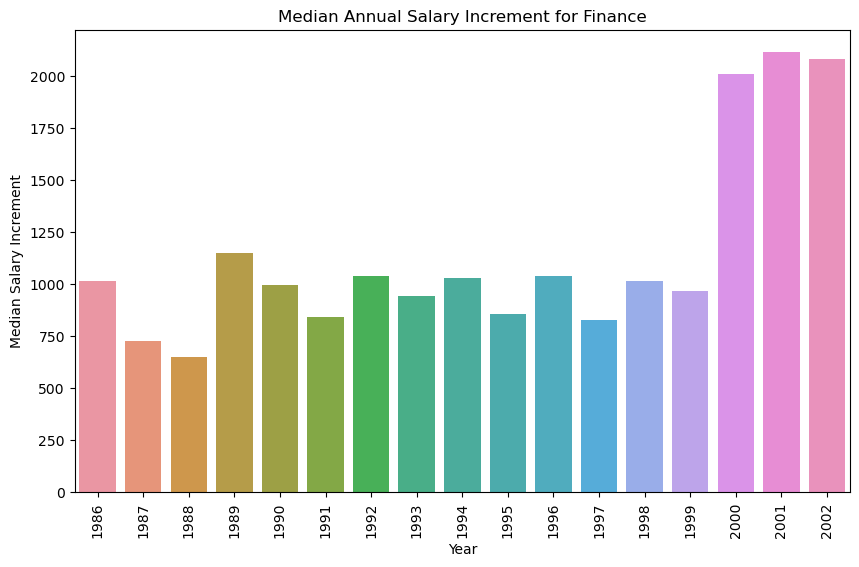

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\2845212977.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn, params=(dept_name,))


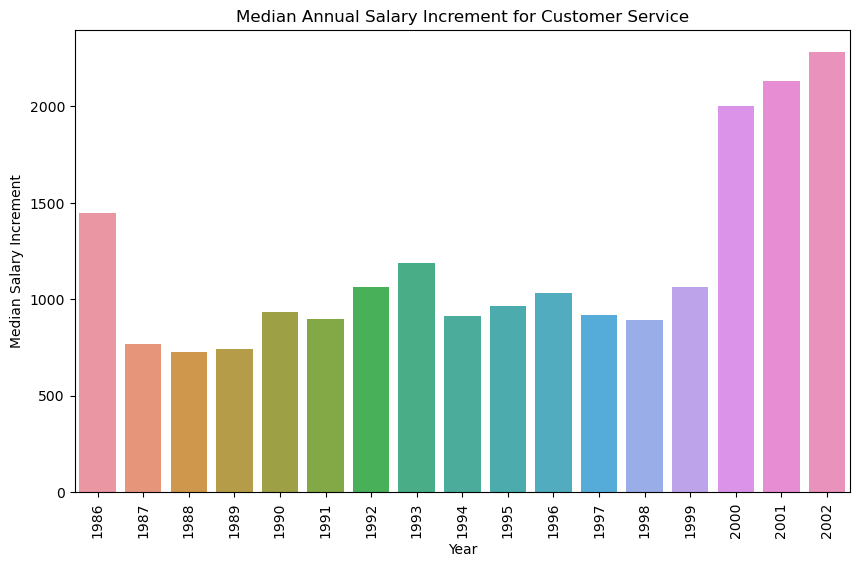

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\2845212977.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn, params=(dept_name,))


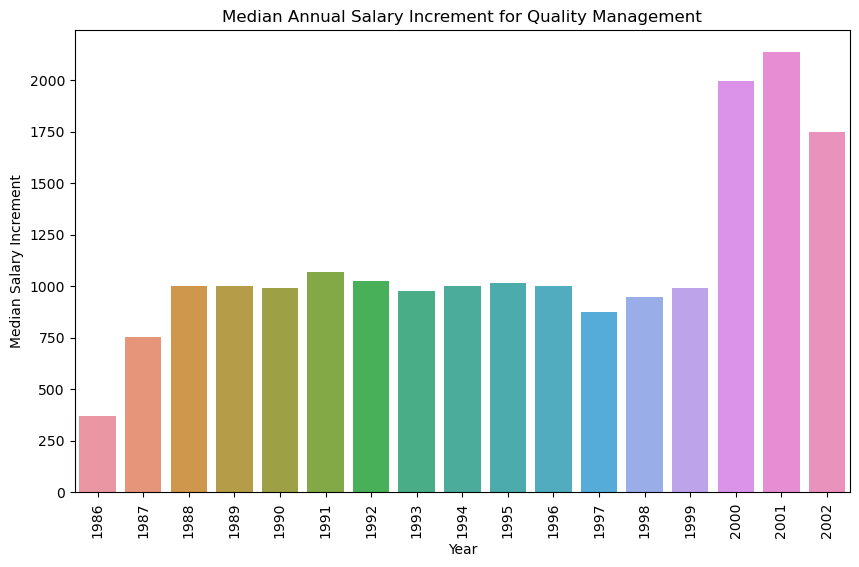

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\2845212977.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn, params=(dept_name,))


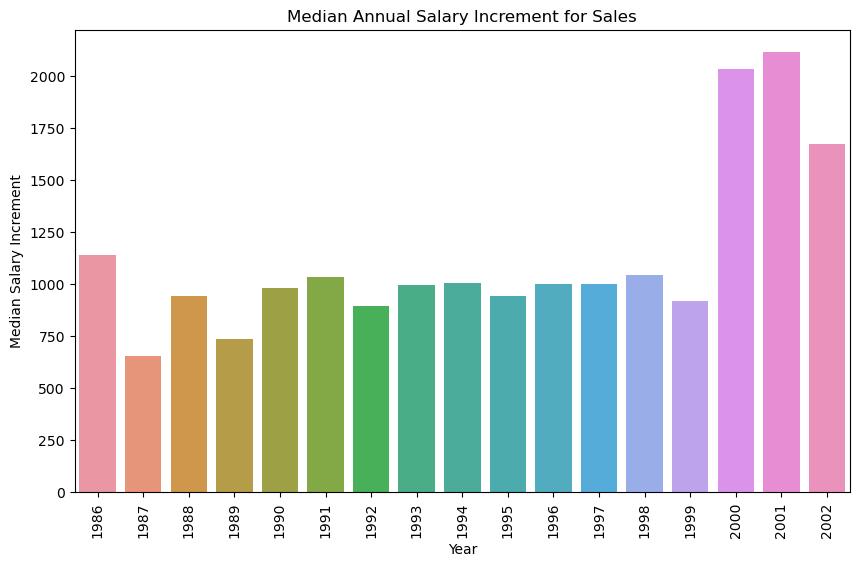

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\2845212977.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn, params=(dept_name,))


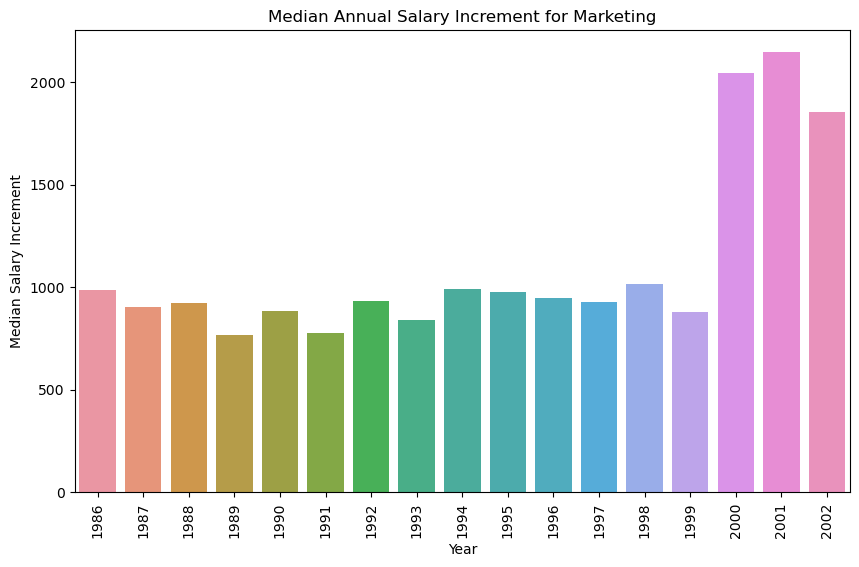

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\2845212977.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn, params=(dept_name,))


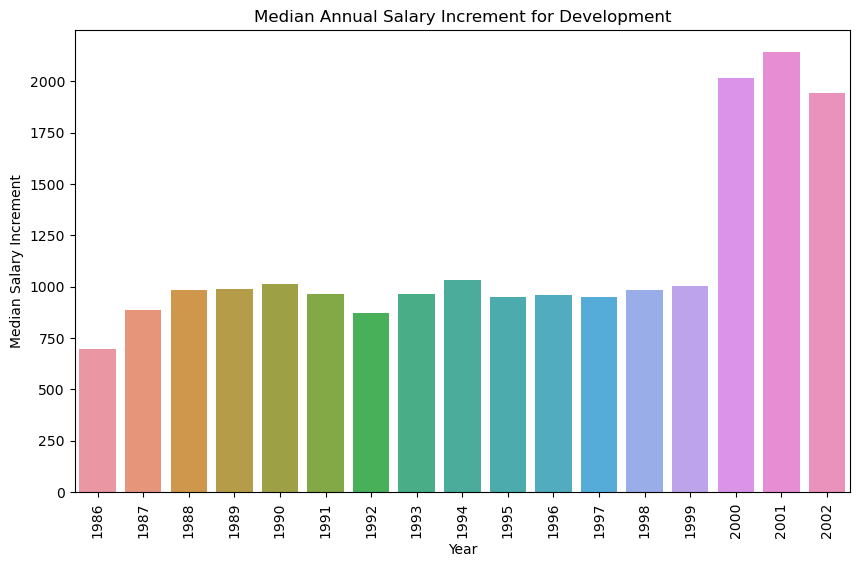

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\2845212977.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn, params=(dept_name,))


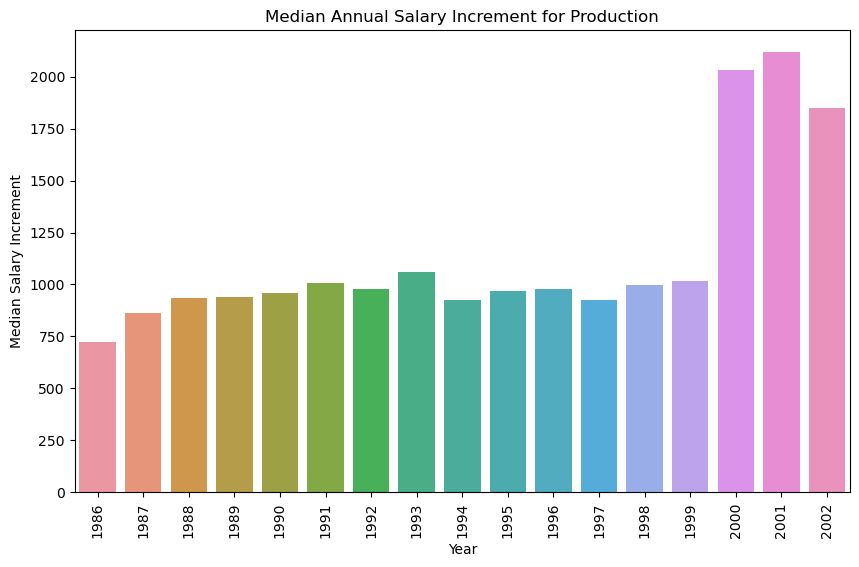

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\2845212977.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn, params=(dept_name,))


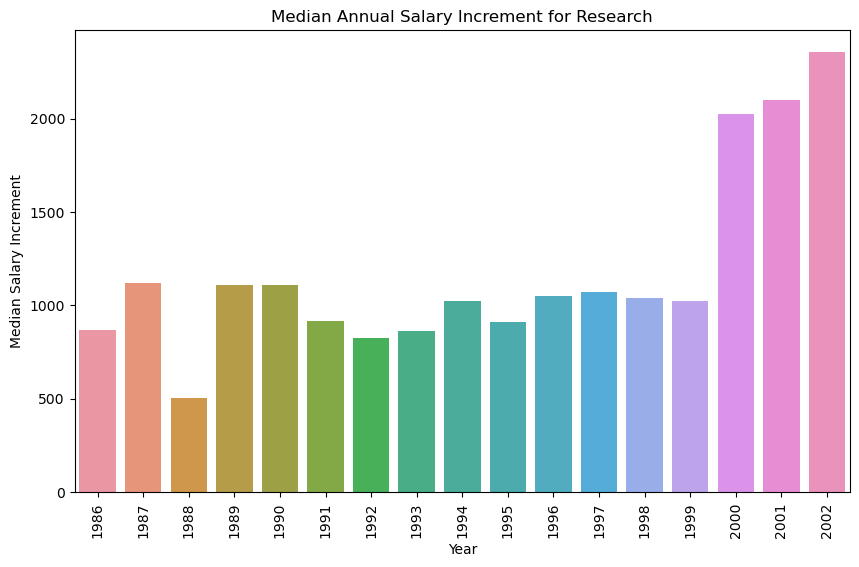

C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\2845212977.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn, params=(dept_name,))


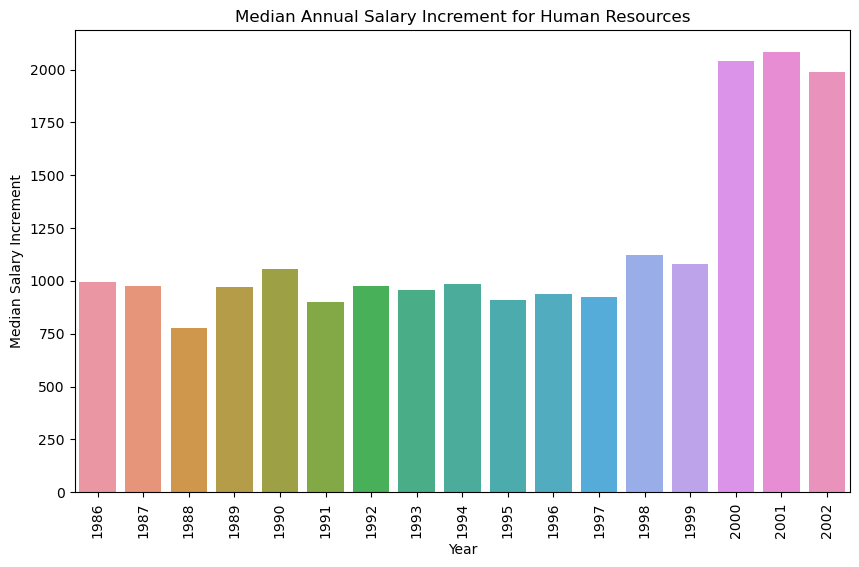

Median Annual Salary Increment Department-wise:
Finance: 1016.38525674017
Customer Service: 965.4212773404506
Quality Management: 1000.4401934459311
Sales: 1002.5438421414292
Marketing: 931.8566599596816
Development: 981.6860240095994
Production: 977.1274022142316
Research: 1037.4785071258666
Human Resources: 977.4877220808994


In [58]:
def get_median_salary_incr_dept_wise():
    conn = connect_to_DB()  # Connect to the database

    query_to_get_all_dept = """SELECT DISTINCT(dept_name) FROM employees.department"""
    all_dept = pd.read_sql_query(query_to_get_all_dept, conn)['dept_name'].tolist()

    median_incr = {}

    for dept_name in all_dept:
        query = """
        SELECT s.amount, d.dept_name, date_part('year', s.from_date) AS start, date_part('year', s.to_date) AS end
        FROM employees.salary s
        JOIN employees.department_employee de ON s.employee_id = de.employee_id
        JOIN employees.department d ON d.id = de.department_id
        WHERE dept_name = %s
        ORDER BY s.from_date DESC
        """
        df = pd.read_sql_query(query, conn, params=(dept_name,))

        df['start'] = df['start'].astype('int')
        df['end'] = df['end'].astype('int')

        my_df = df.groupby(['start'])['amount'].mean().diff()
        my_df.dropna(inplace=True)

        plt.figure(figsize=(10, 6))
        plot = sns.barplot(x=my_df.index, y=my_df.values)

        for tick in plot.get_xticklabels():
            tick.set_rotation(90)

        median_incr[dept_name] = np.median(my_df.values)

        plt.title(f"Median Annual Salary Increment for {dept_name}")
        plt.xlabel("Year")
        plt.ylabel("Median Salary Increment")
        plt.show()

    return median_incr

# Call the function to calculate and visualize the median salary increment
median_increment = get_median_salary_incr_dept_wise()
print("Median Annual Salary Increment Department-wise:")
for dept, median in median_increment.items():
    print(f"{dept}: {median}")


C:\Users\shiva\AppData\Local\Temp\ipykernel_17756\2716115500.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


            dept_name  median_annual_salary_increment
0  Quality Management                         57459.0
1     Human Resources                         61356.5
2            Research                         62709.0
3          Production                         65290.0
4         Development                         67305.0
5    Customer Service                         72352.0
6             Finance                         73573.0
7           Marketing                         76386.0
8               Sales                         89566.0


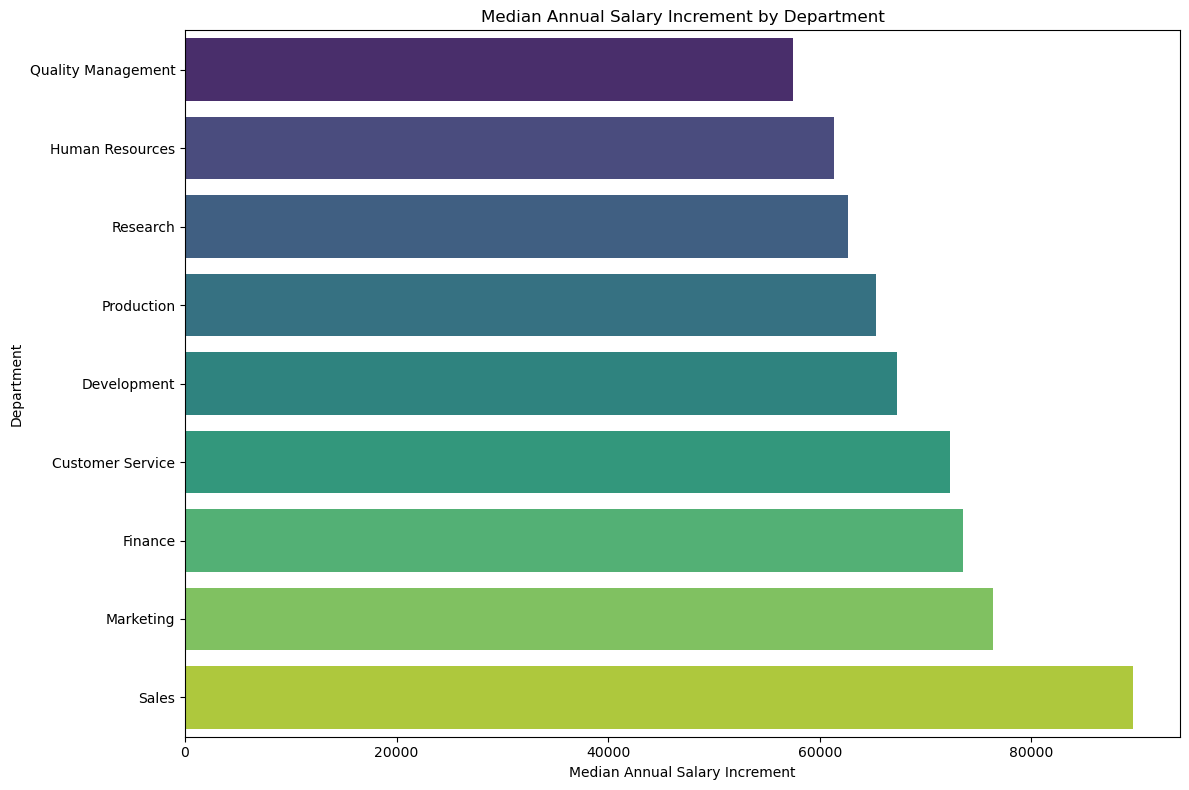

In [60]:
def median_salary_incr_deptwise():
    conn = connect_to_DB()
    query = """ with salary_increment as 
                    (select d.dept_name, date_part('year', s.from_date) as start, 
                    date_part('year', s.to_date) as end, max(s.amount) - min(s.amount) as annual_increment
                    from employees.department d join employees.department_employee de 
                    on d.id = de.department_id
                    join employees.salary s on de.employee_id =s.employee_id
                    group by d.dept_name, date_part('year', s.from_date), date_part('year', s.to_date))
                select dept_name, percentile_cont(0.5) WITHIN GROUP (ORDER BY annual_increment) as median_annual_salary_increment
                from salary_increment 
                group by dept_name
                order by median_annual_salary_increment """
    df = pd.read_sql_query(query, conn)
    print(df)
    # Create a Seaborn bar plot to visualize the median annual salary increments department-wise
    plt.figure(figsize=(12, 8))
    sns.barplot(x='median_annual_salary_increment', y='dept_name', data=df, palette='viridis')
    plt.xlabel('Median Annual Salary Increment')
    plt.ylabel('Department')
    plt.title('Median Annual Salary Increment by Department')
    plt.tight_layout()
    plt.show()
    
median_salary_incr_deptwise()    